In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns



In [3]:
train = pd.read_csv('../data/train_ver2.csv')

/var/folders/0x/y5ht6wyj4ql4by49_d742qs00000gn/T/ipykernel_21059/2517203885.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train_ver2.csv')


## Check data

In [3]:
train.shape

(13647309, 48)

In [5]:
train.head()


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [6]:
for col in train.columns:
    print(f'{train[col].head()} \n')


0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object 

0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64 

0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object 

0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object 

0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object 

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object 

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object 

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64 

0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object 

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64 

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object 

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: ind

In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

### 고객 정보 변수 - 수치형 & 범주형

In [4]:
train_cst = train.iloc[:, :25]
num_cols = [col for col in train_cst.columns if train_cst[col].dtype in ['int64', 'float64']]
train_cst[num_cols].describe()


,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00


* ind_nuevo: 신규 고객 지표, 최소 75%는 0
* indrel: 고객 등급, 최소 75%는 1
* tipodom: 전체 동일 값 -> 의미없음
* cod_prov : 지방 코드, 1~52 -> 범주형
* ind_actividad_client : 50% 정도 0, 나머지 1
* renta : 가구 총소득, 전형적인 소득 분포를 가질 것으로 예상됨

### 고객 정보 변수 - object 타입

In [5]:
obj_cols = [col for col in train_cst.columns if train_cst[col].dtype in ['object']]
train_cst[obj_cols].describe()


,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


In [6]:
# 고유값 확인
for col in obj_cols:
    unique = np.unique(train_cst[col].astype(str))
    print('-'*50)
    print(f'column : {col} / # of unique : {len(unique)} \n {unique}')


--------------------------------------------------
column : fecha_dato / # of unique : 17 
 ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
column : ind_empleado / # of unique : 6 
 ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
column : pais_residencia / # of unique : 119 
 ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' '

In [6]:
# unique 값의 비중 확인

for col in obj_cols:
    print('-'*50)
    print(col)
    print(train_cst[col].value_counts())


--------------------------------------------------
fecha_dato
2016-05-28    931453
2016-04-28    928274
2016-03-28    925076
2016-02-28    920904
2016-01-28    916269
2015-12-28    912021
2015-11-28    906109
2015-10-28    892251
2015-09-28    865440
2015-08-28    843201
2015-07-28    829817
2015-06-28    632110
2015-05-28    631957
2015-04-28    630367
2015-03-28    629209
2015-02-28    627394
2015-01-28    625457
Name: fecha_dato, dtype: int64
--------------------------------------------------
ind_empleado
N    13610977
B        3566
F        2523
A        2492
S          17
Name: ind_empleado, dtype: int64
--------------------------------------------------
pais_residencia
ES    13553710
FR        5161
AR        4835
DE        4625
GB        4605
        ...   
ZW          11
DJ          11
JM          11
BM           6
MT           2
Name: pais_residencia, Length: 118, dtype: int64
--------------------------------------------------
sexo
V    7424252
H    6195253
Name: sexo, dtype: i

## 시각화로 데이터 확인


### 각 변수에 대한 histogram

--------------------------------------------------
col :  fecha_dato


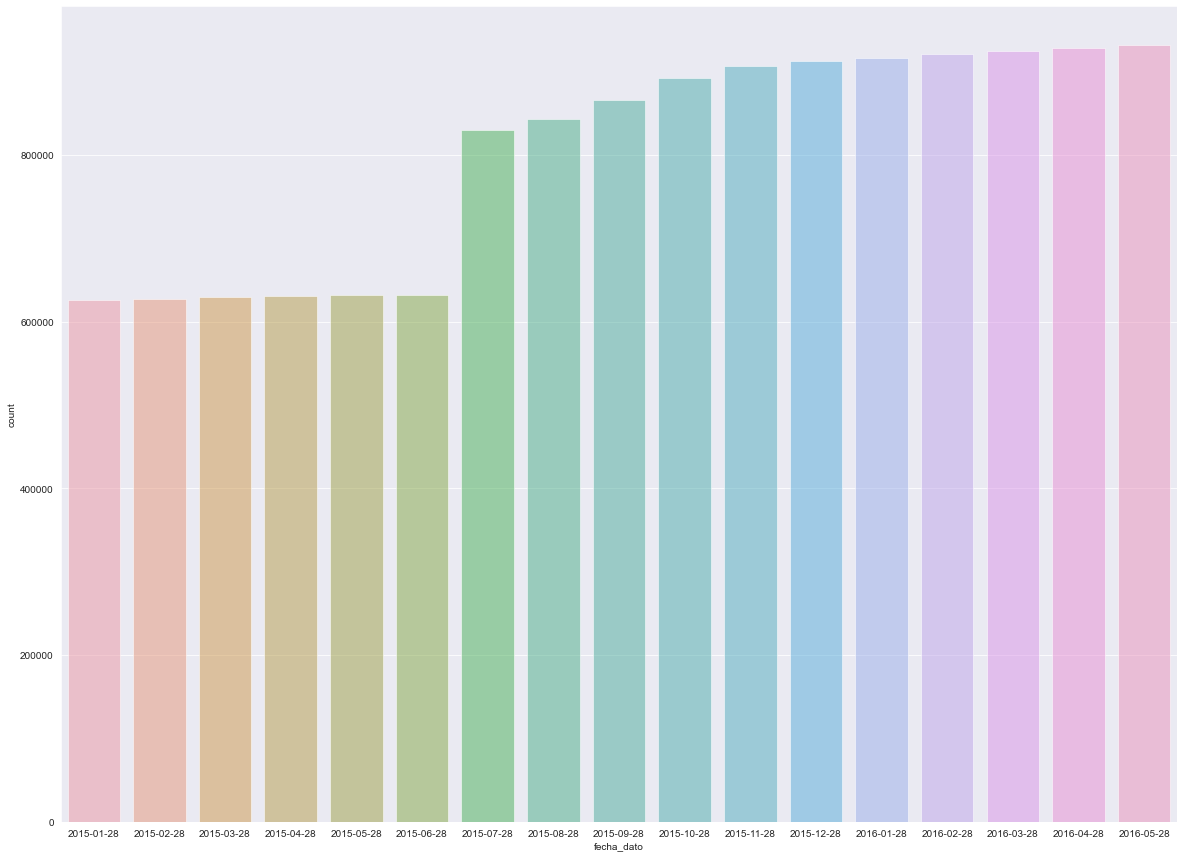

--------------------------------------------------
col :  ind_empleado


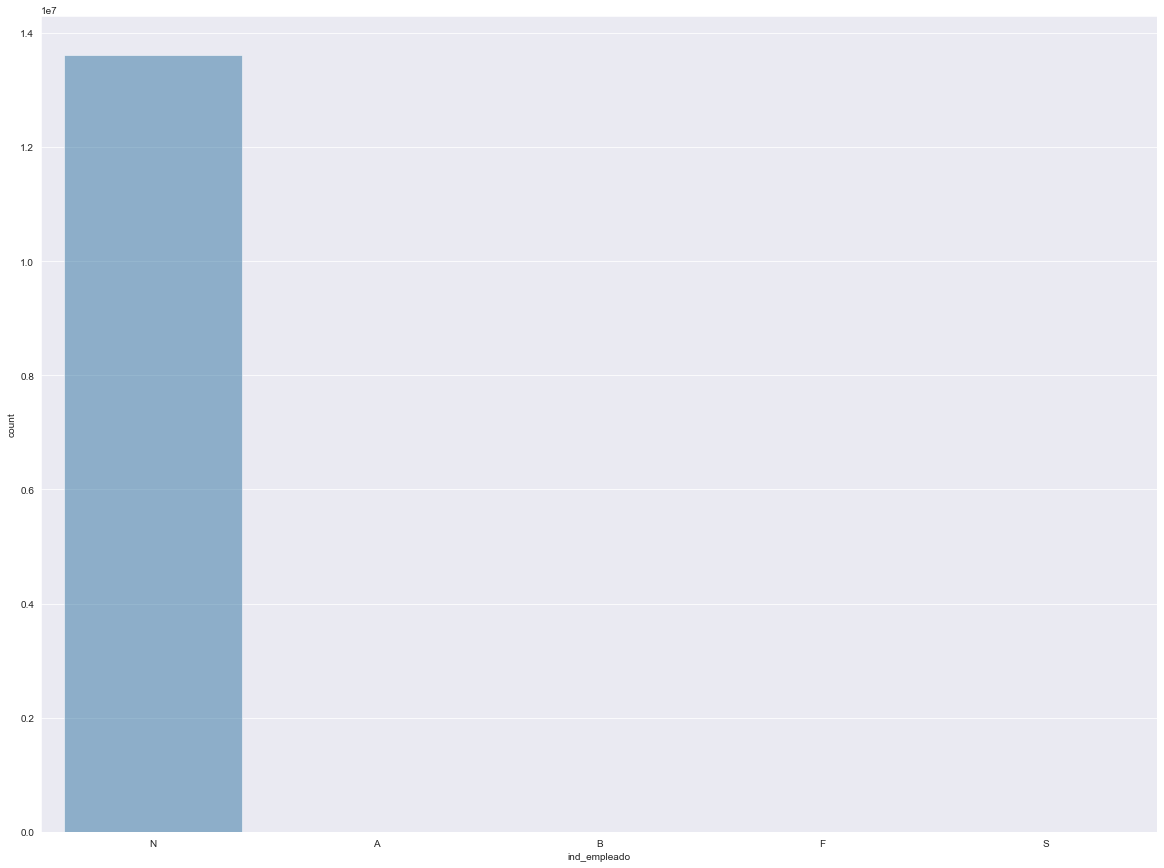

--------------------------------------------------
col :  pais_residencia


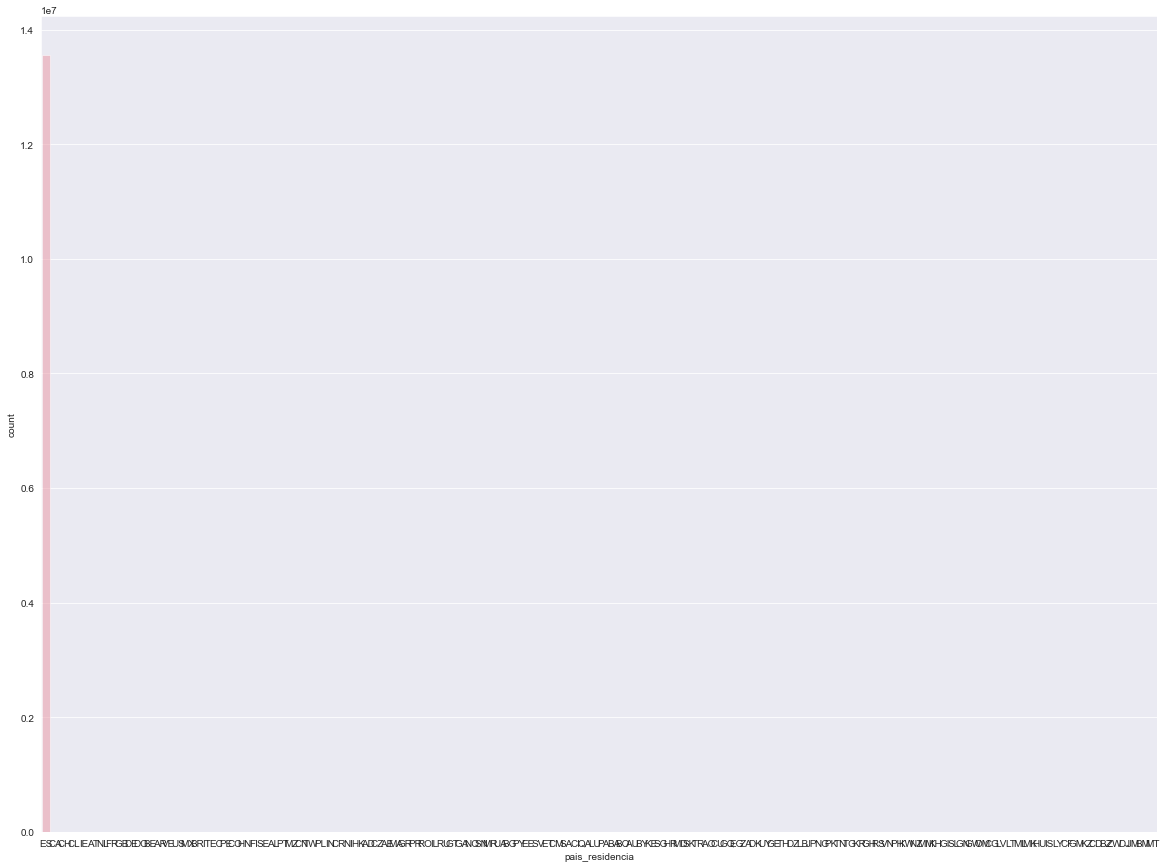

--------------------------------------------------
col :  sexo


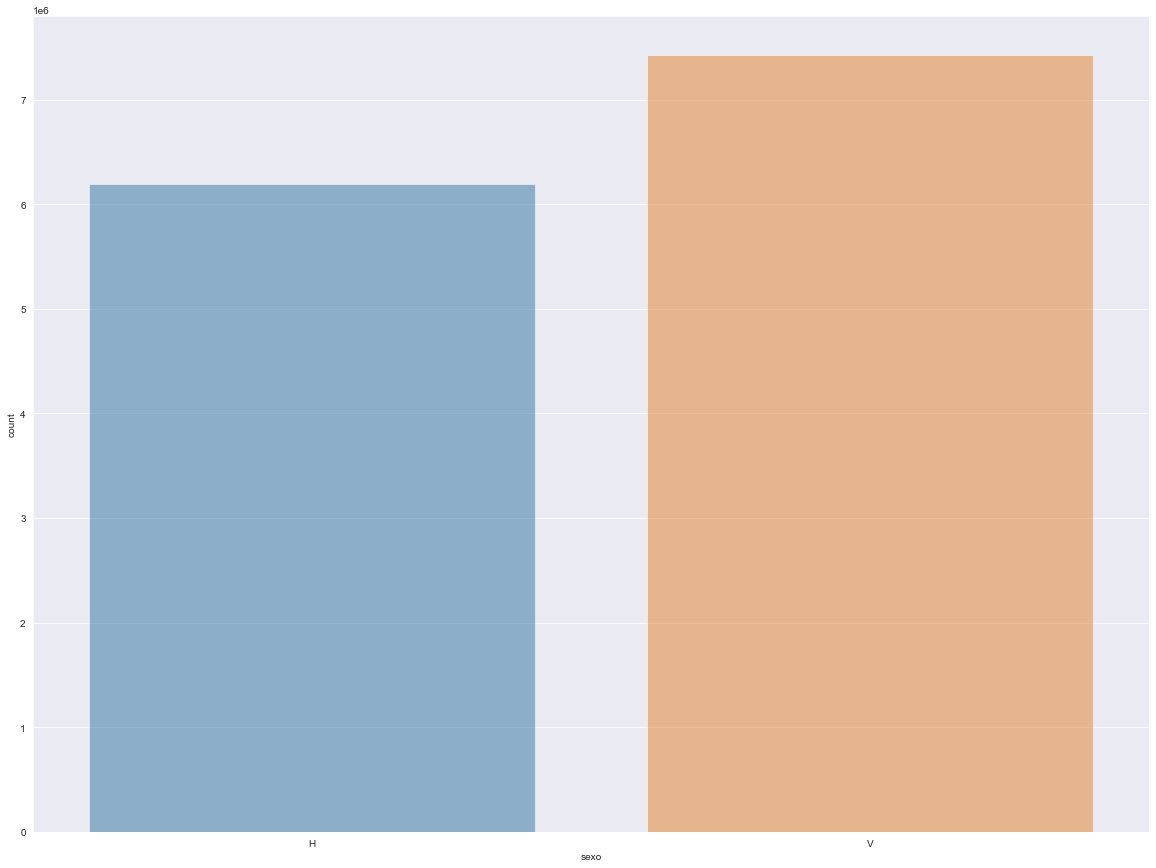

--------------------------------------------------
col :  age


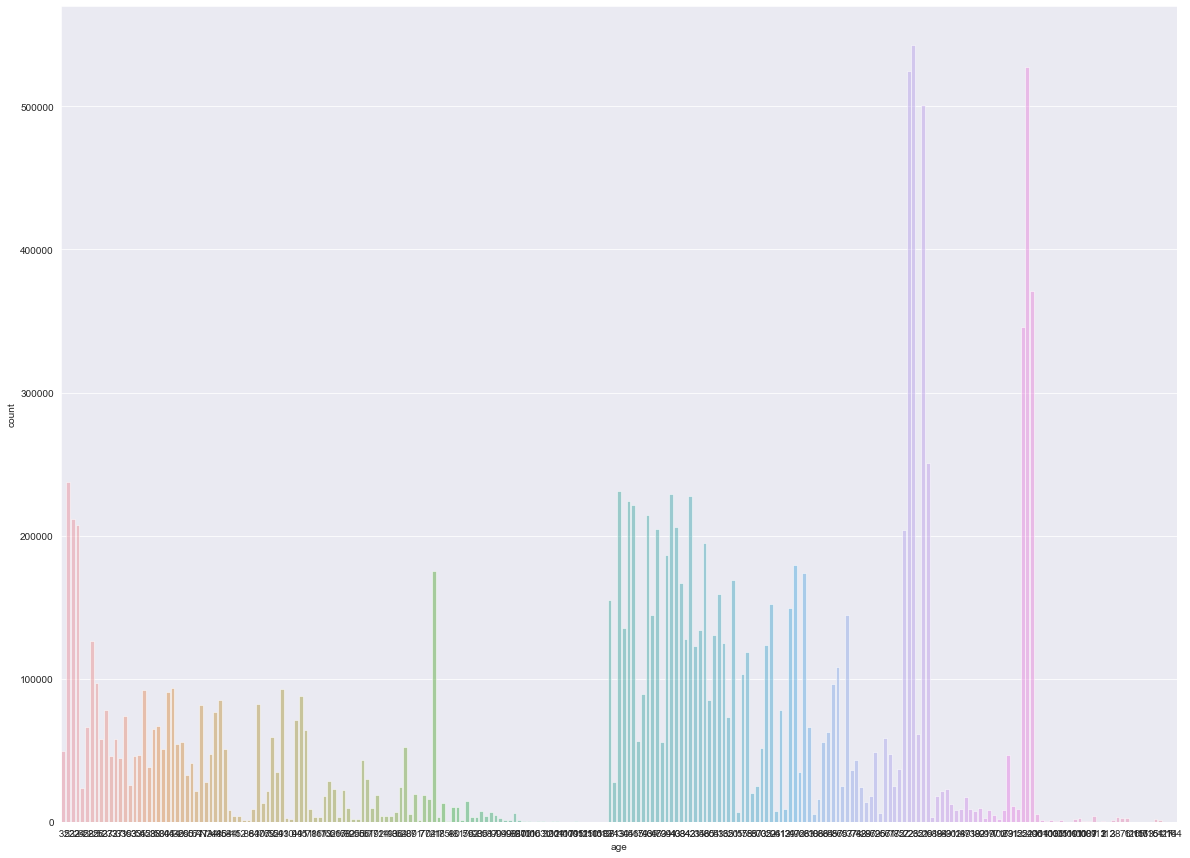

--------------------------------------------------
col :  fecha_alta


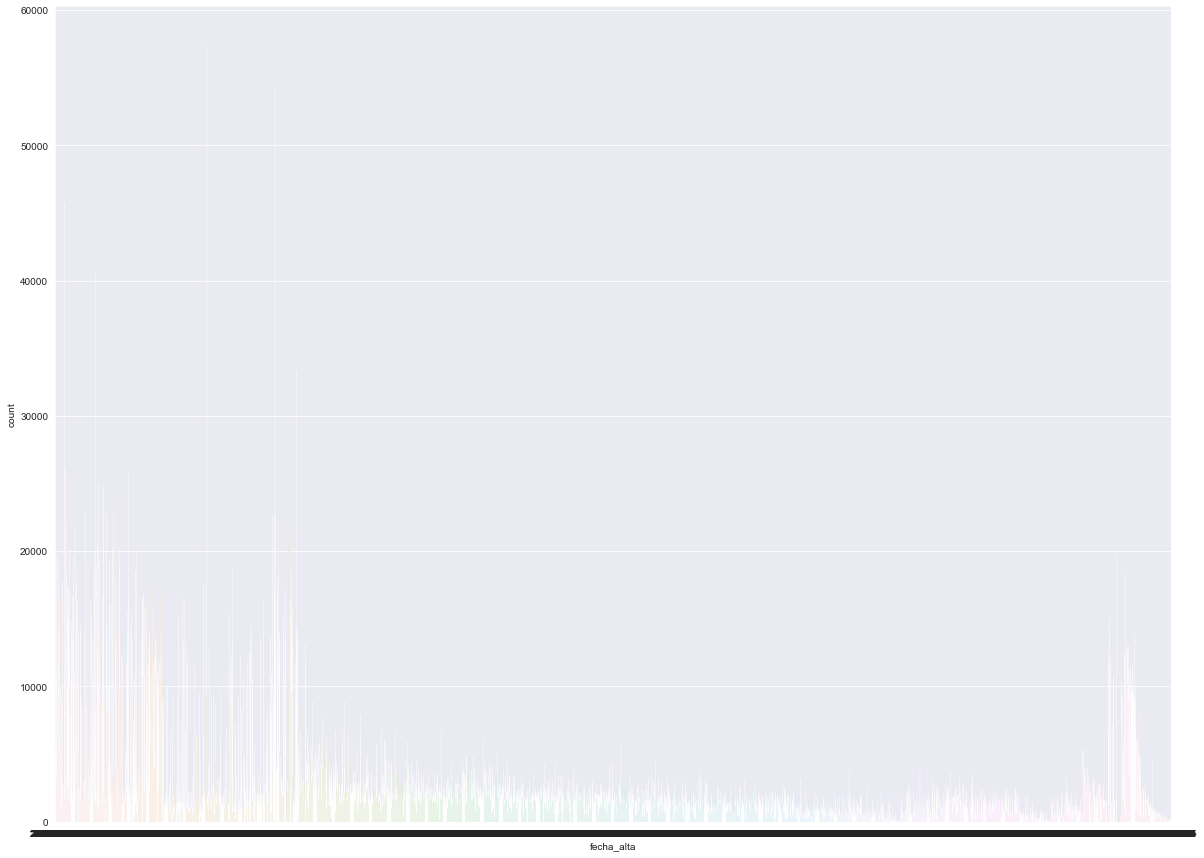

--------------------------------------------------
col :  ind_nuevo


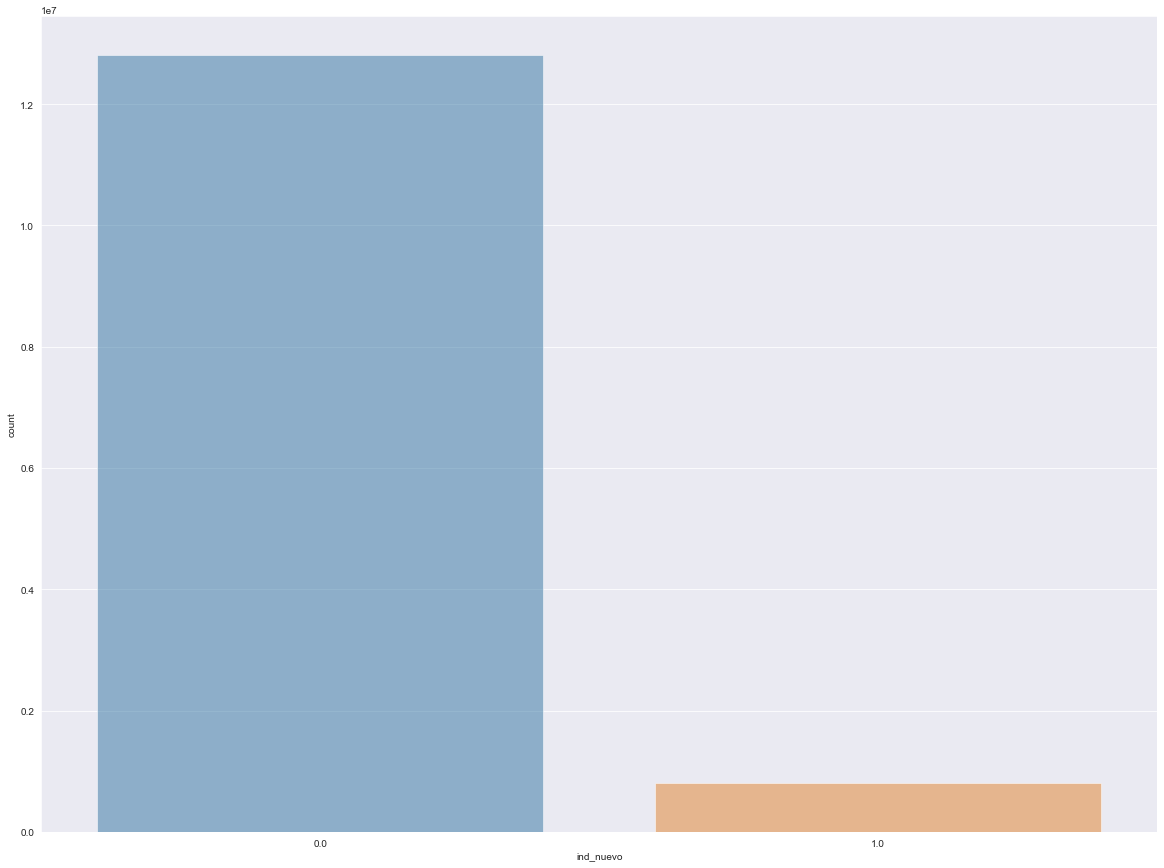

--------------------------------------------------
col :  antiguedad


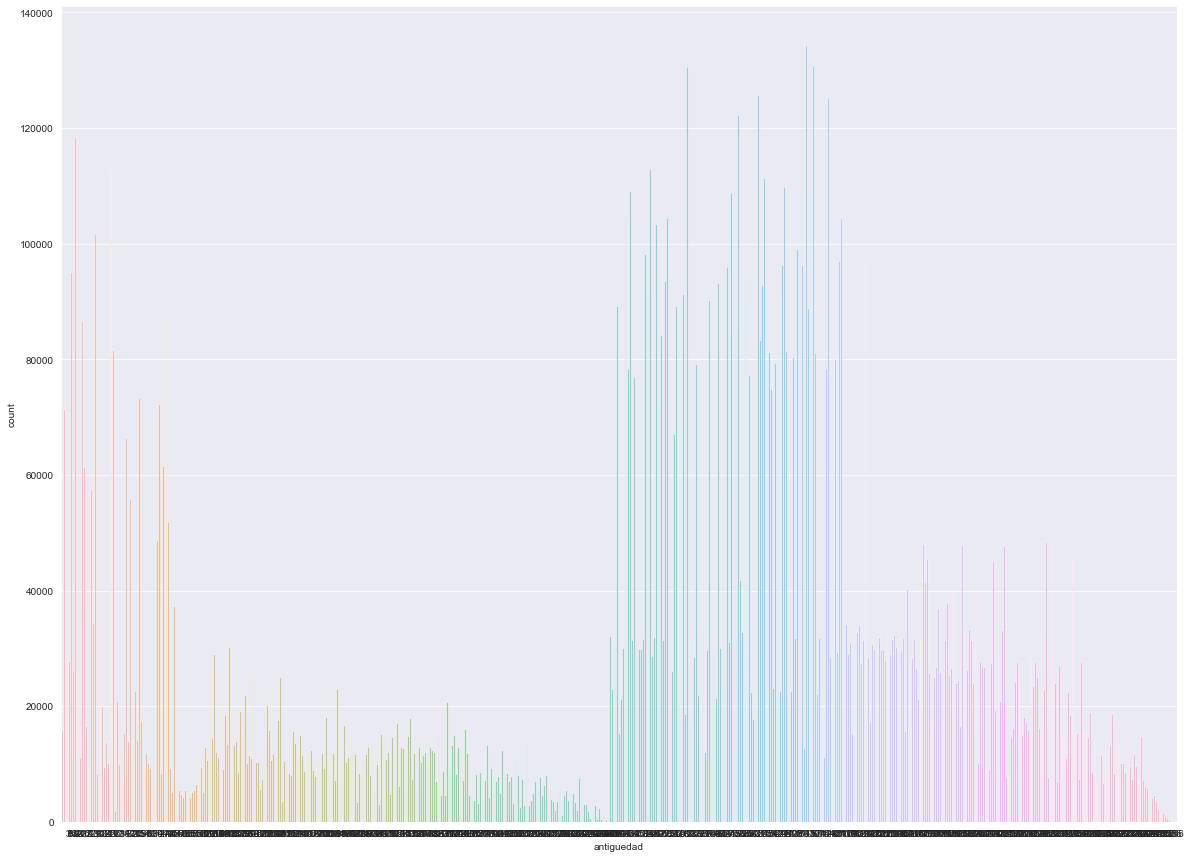

--------------------------------------------------
col :  indrel


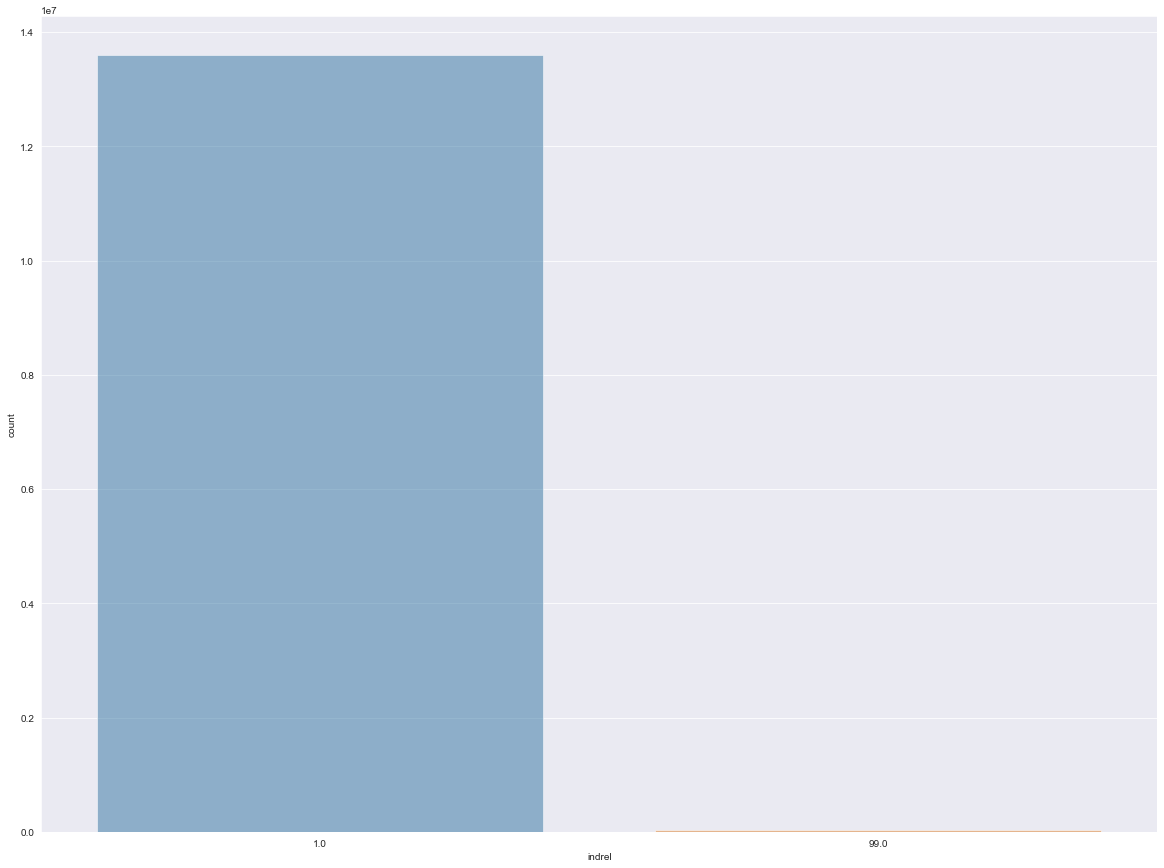

--------------------------------------------------
col :  ult_fec_cli_1t


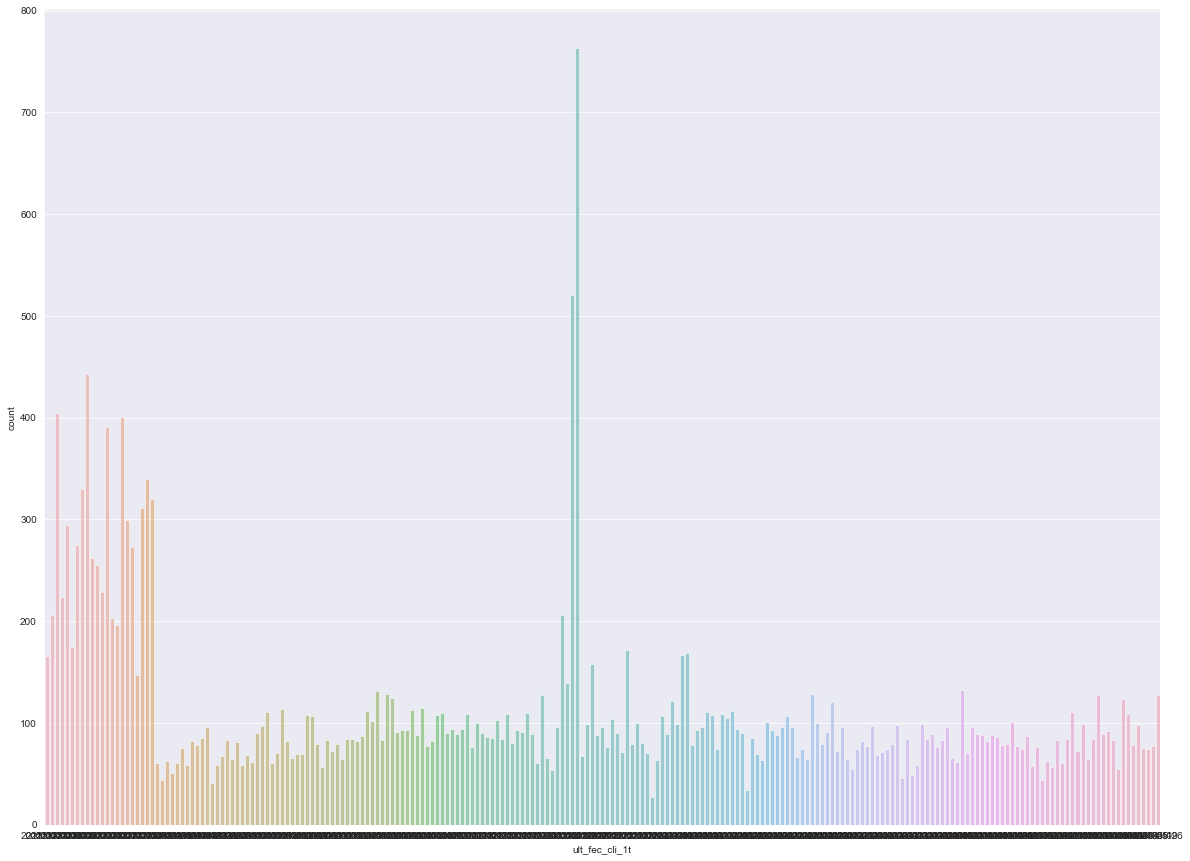

--------------------------------------------------
col :  indrel_1mes


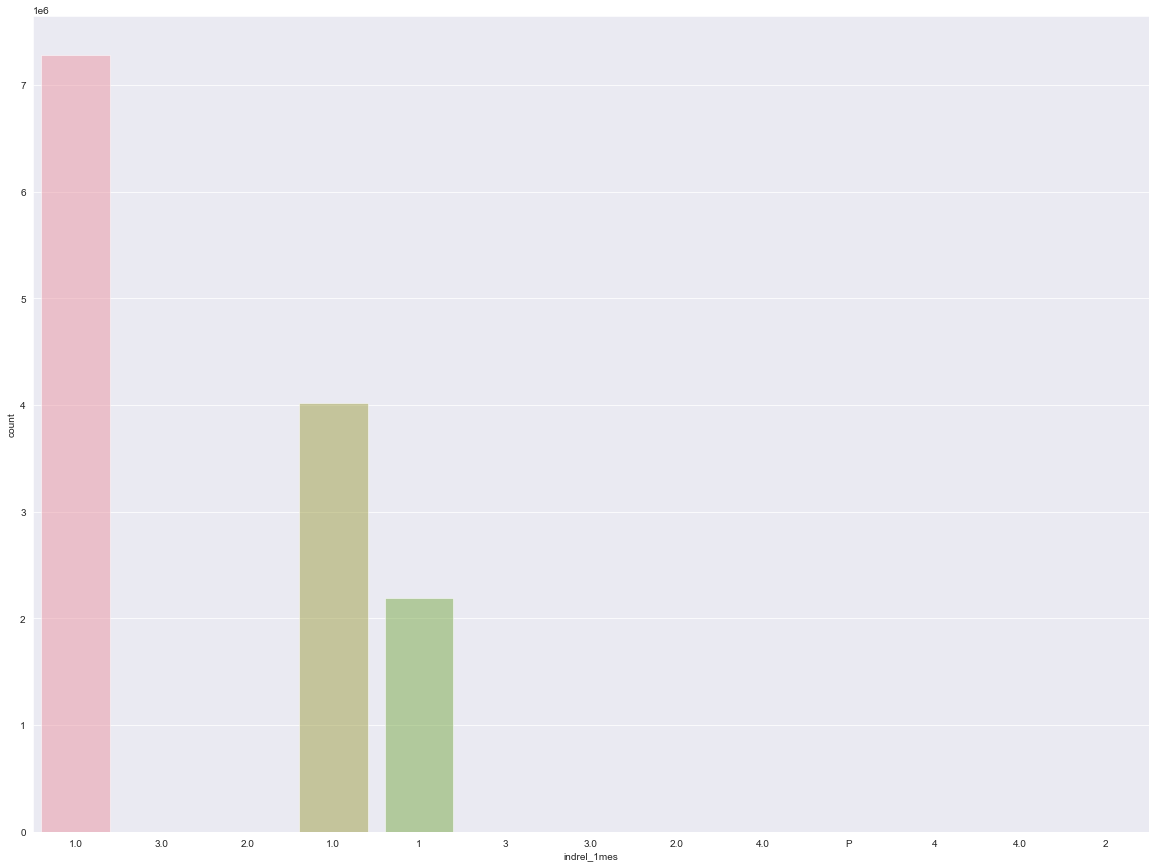

--------------------------------------------------
col :  tiprel_1mes


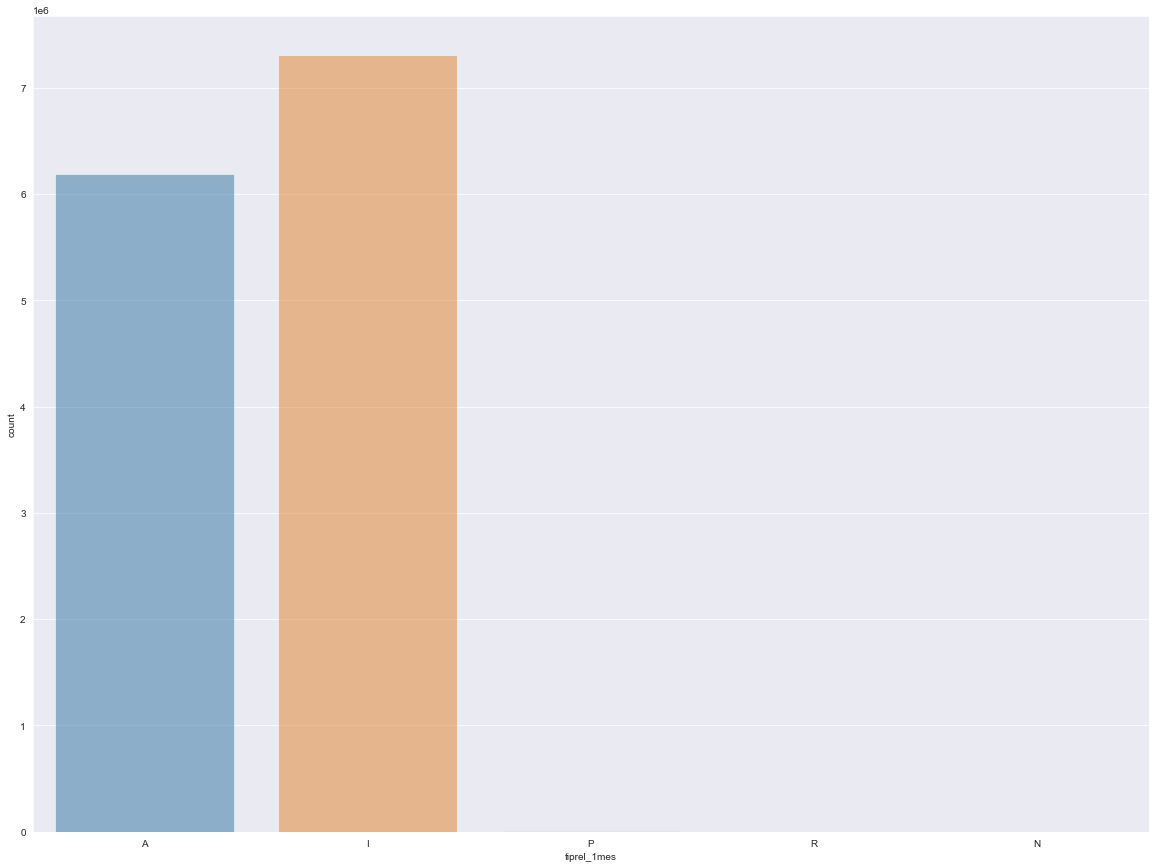

--------------------------------------------------
col :  indresi


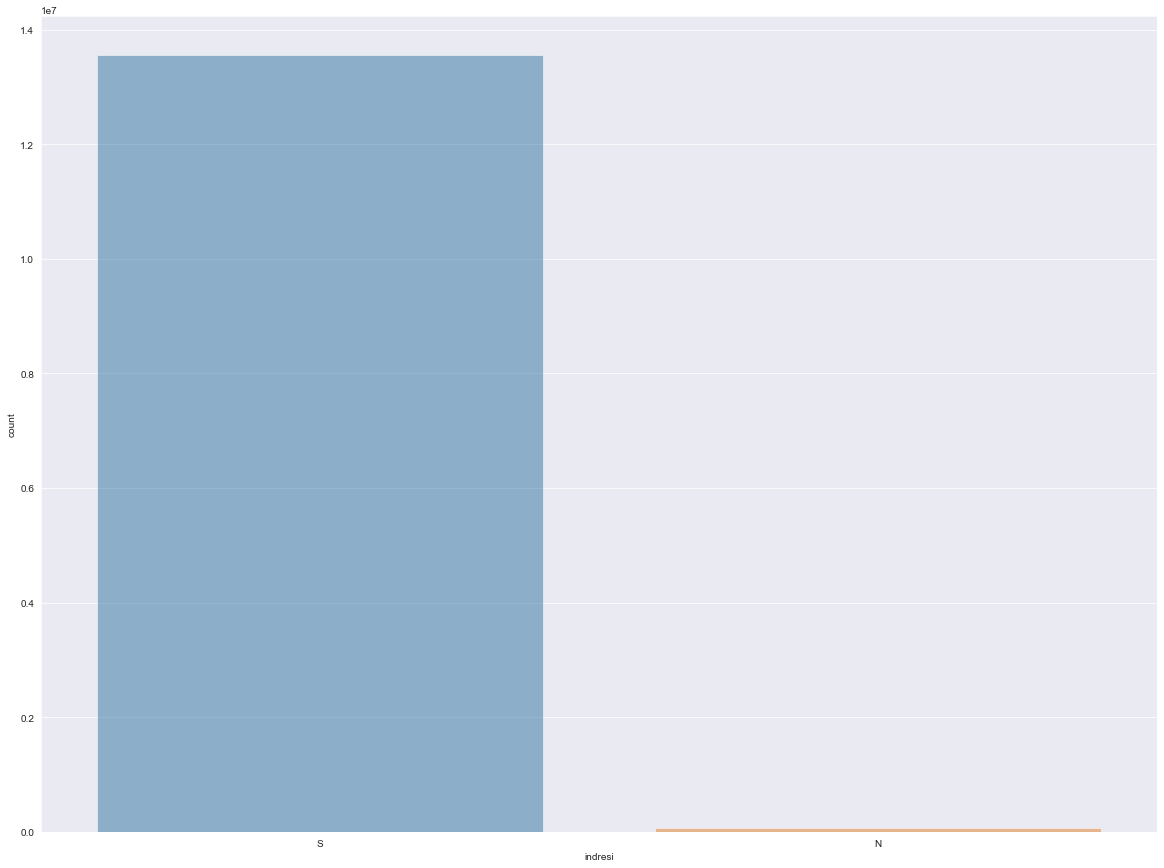

--------------------------------------------------
col :  indext


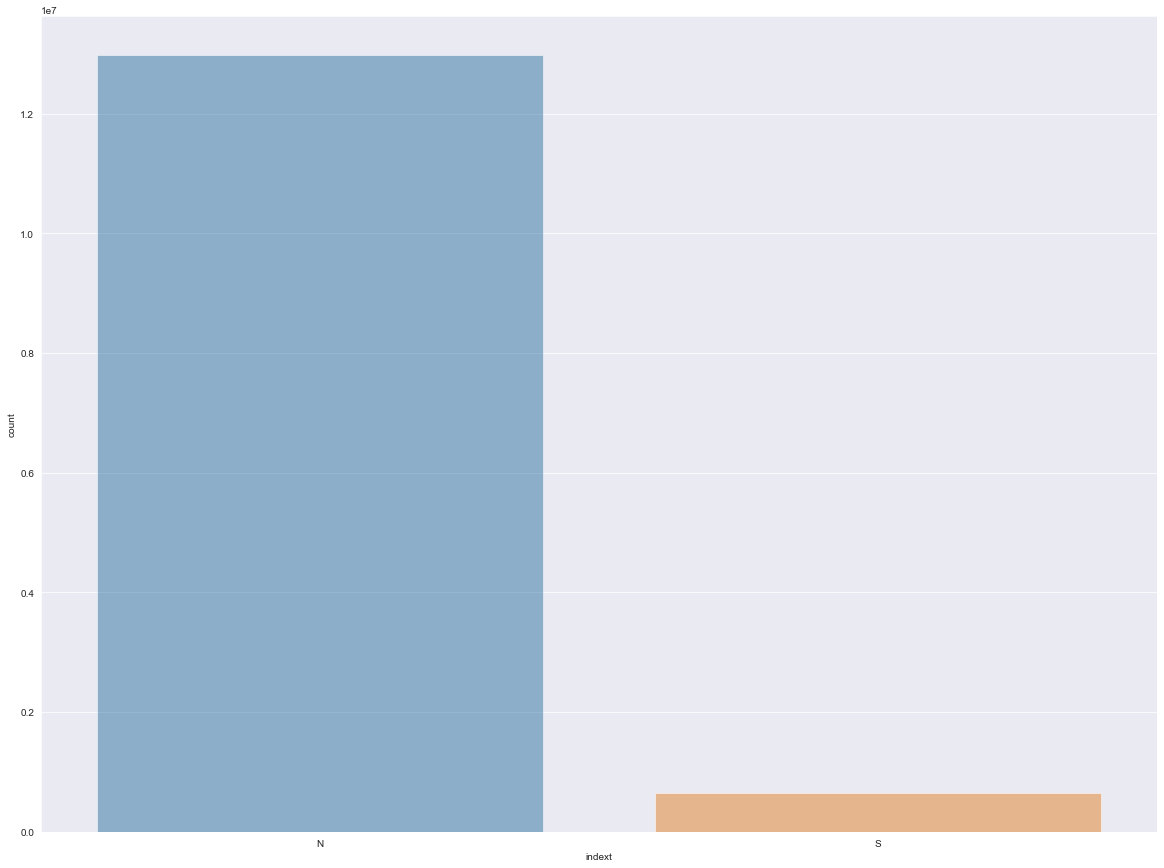

--------------------------------------------------
col :  conyuemp


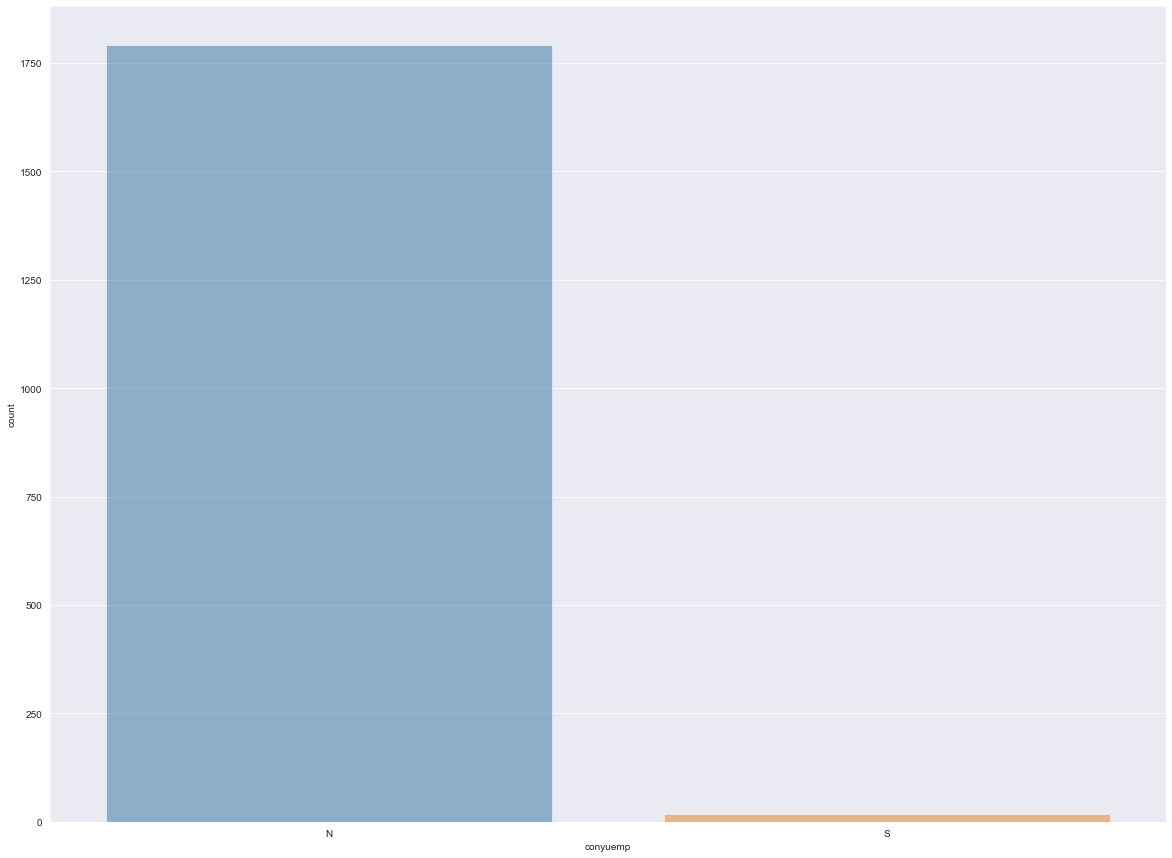

--------------------------------------------------
col :  canal_entrada


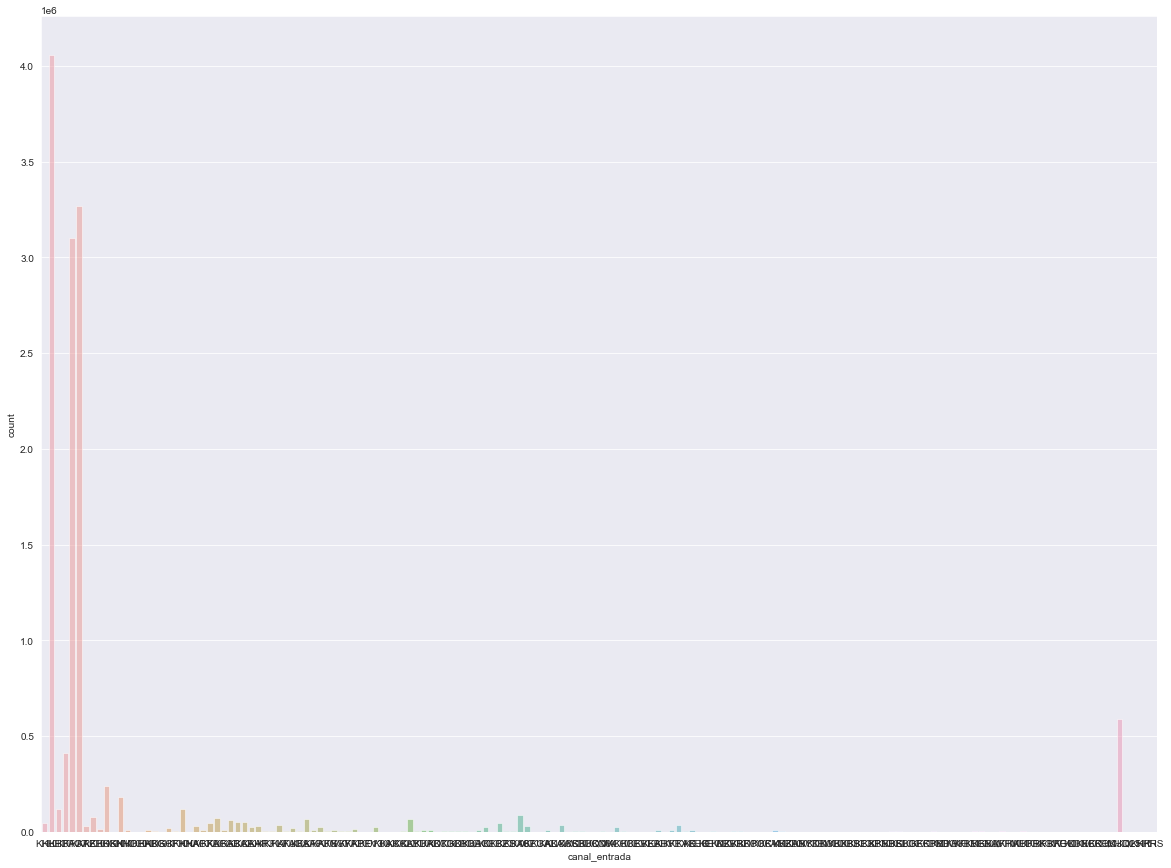

--------------------------------------------------
col :  indfall


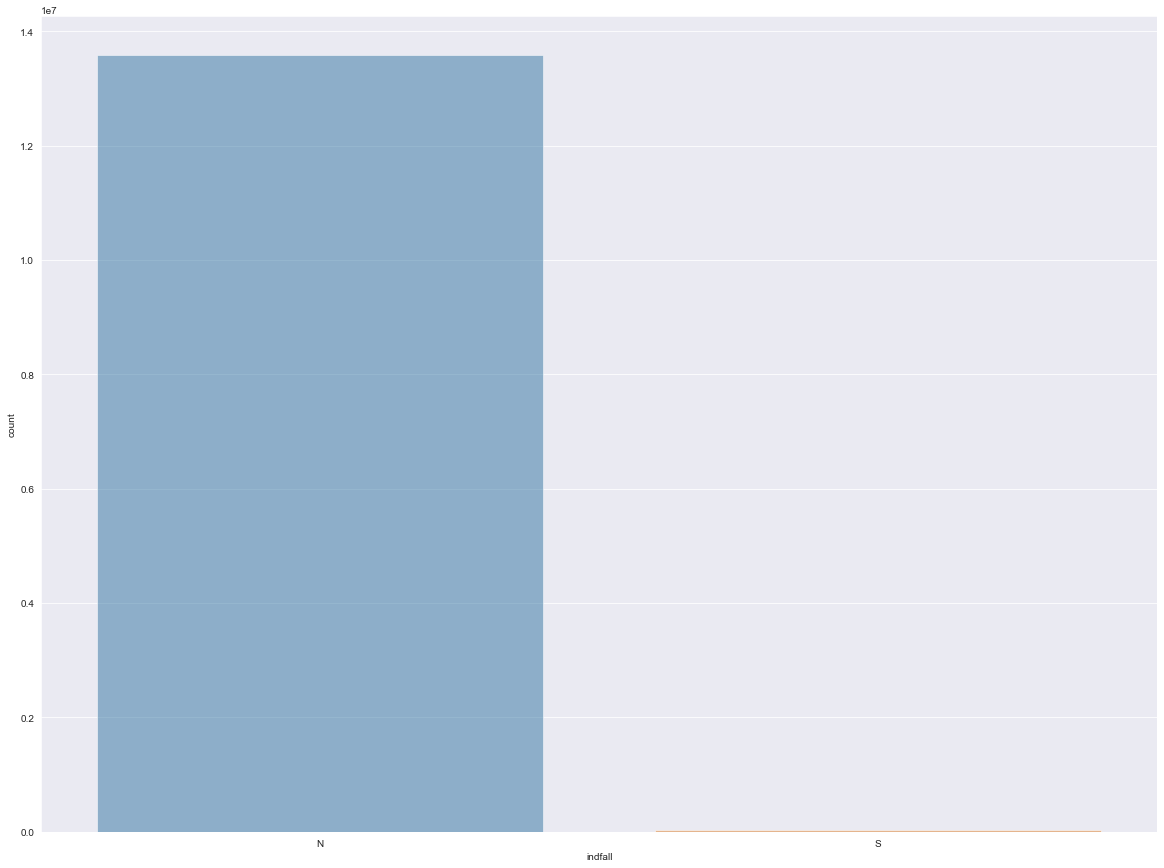

--------------------------------------------------
col :  tipodom


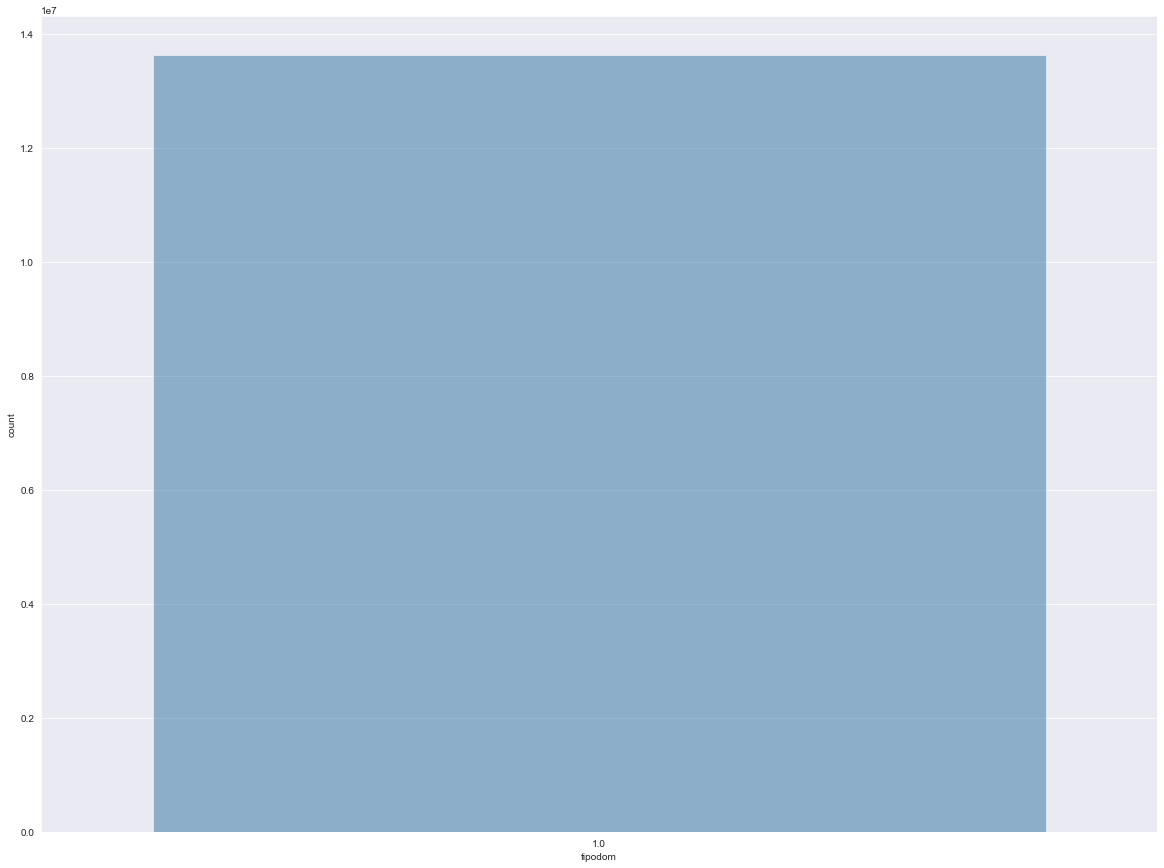

--------------------------------------------------
col :  cod_prov


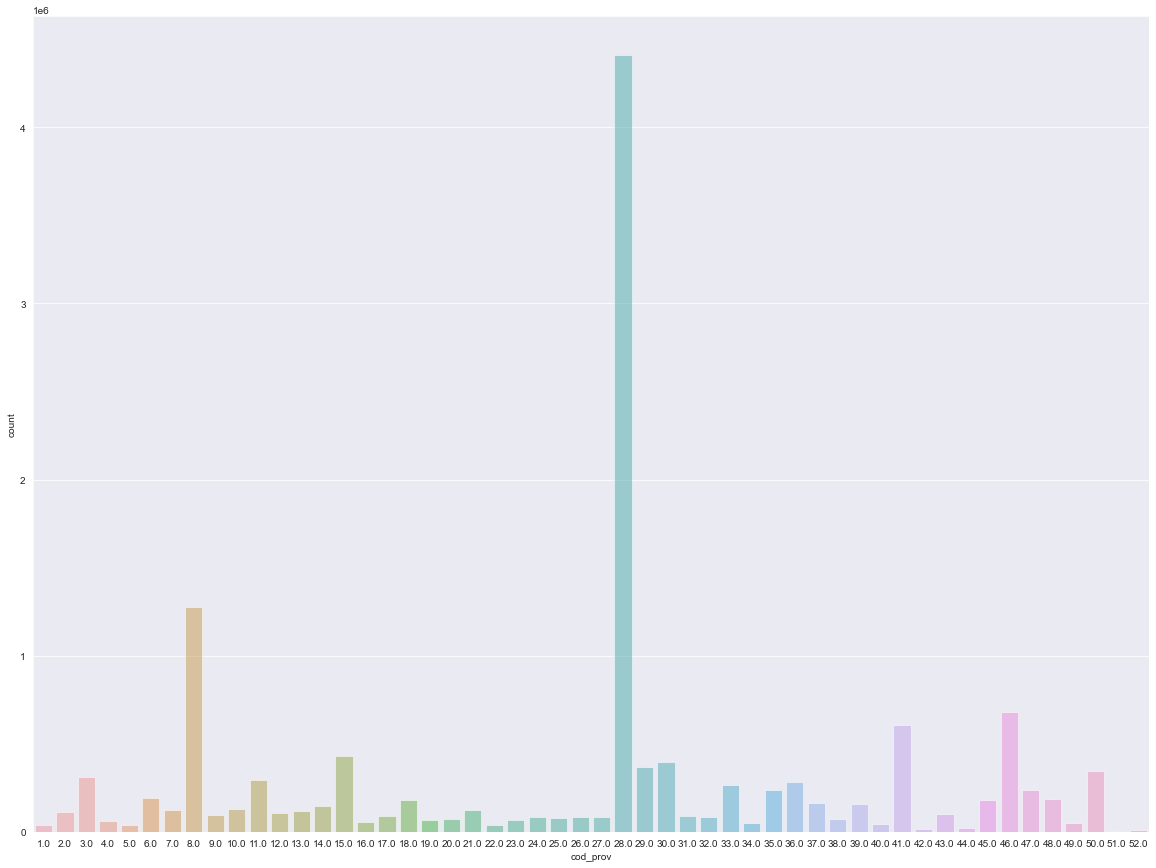

--------------------------------------------------
col :  nomprov


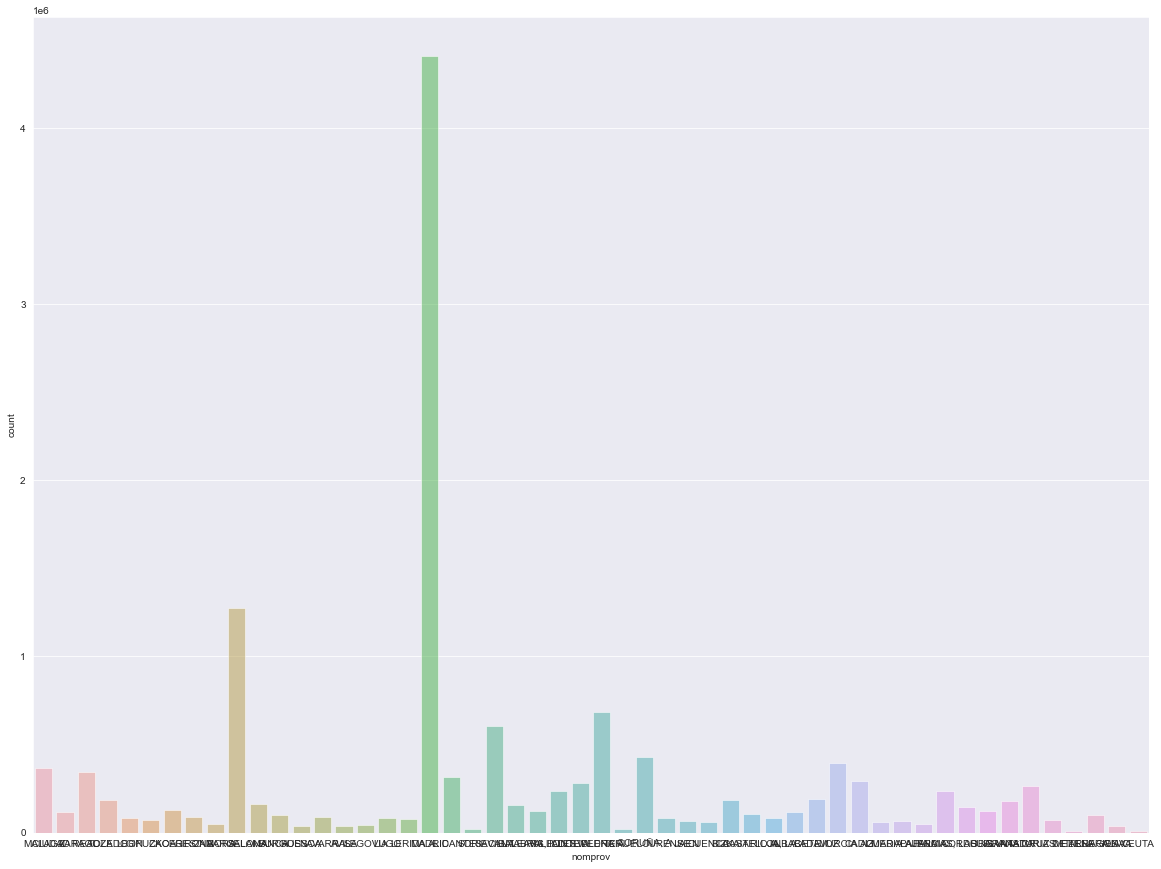

--------------------------------------------------
col :  ind_actividad_cliente


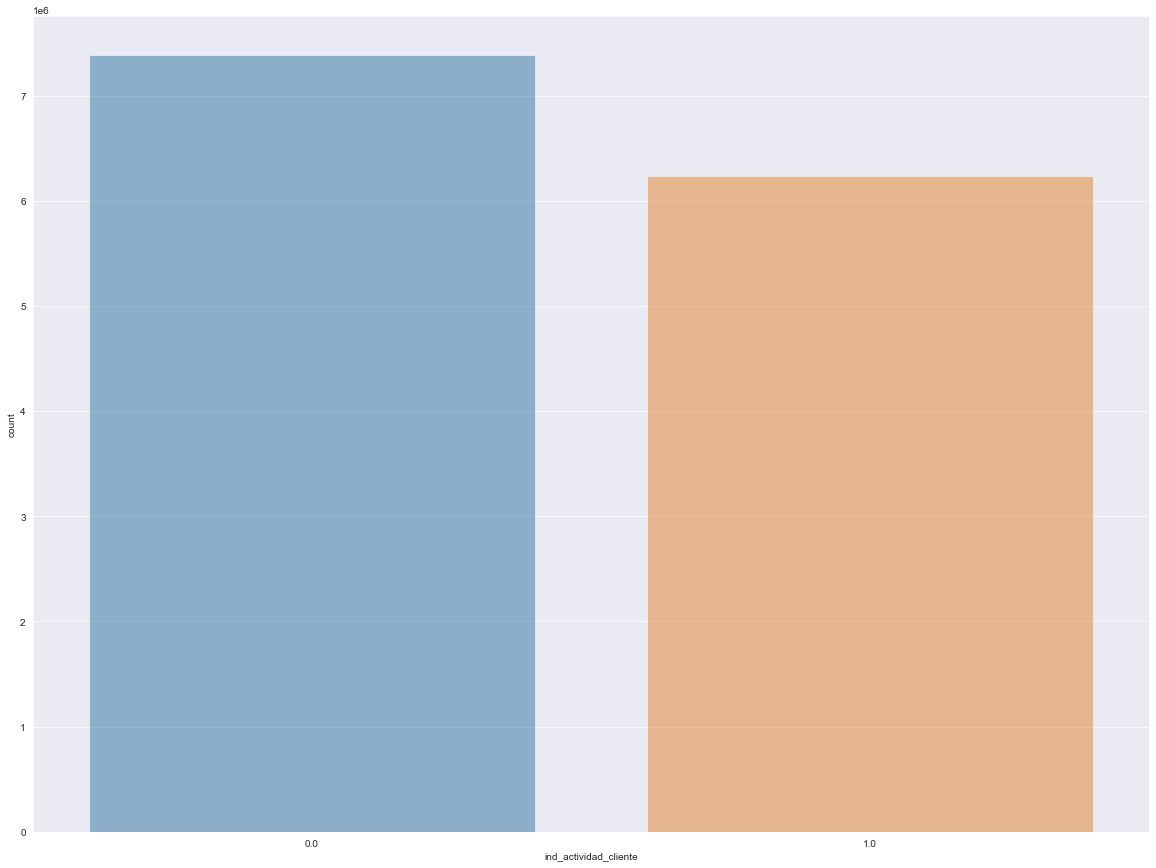

--------------------------------------------------
col :  segmento


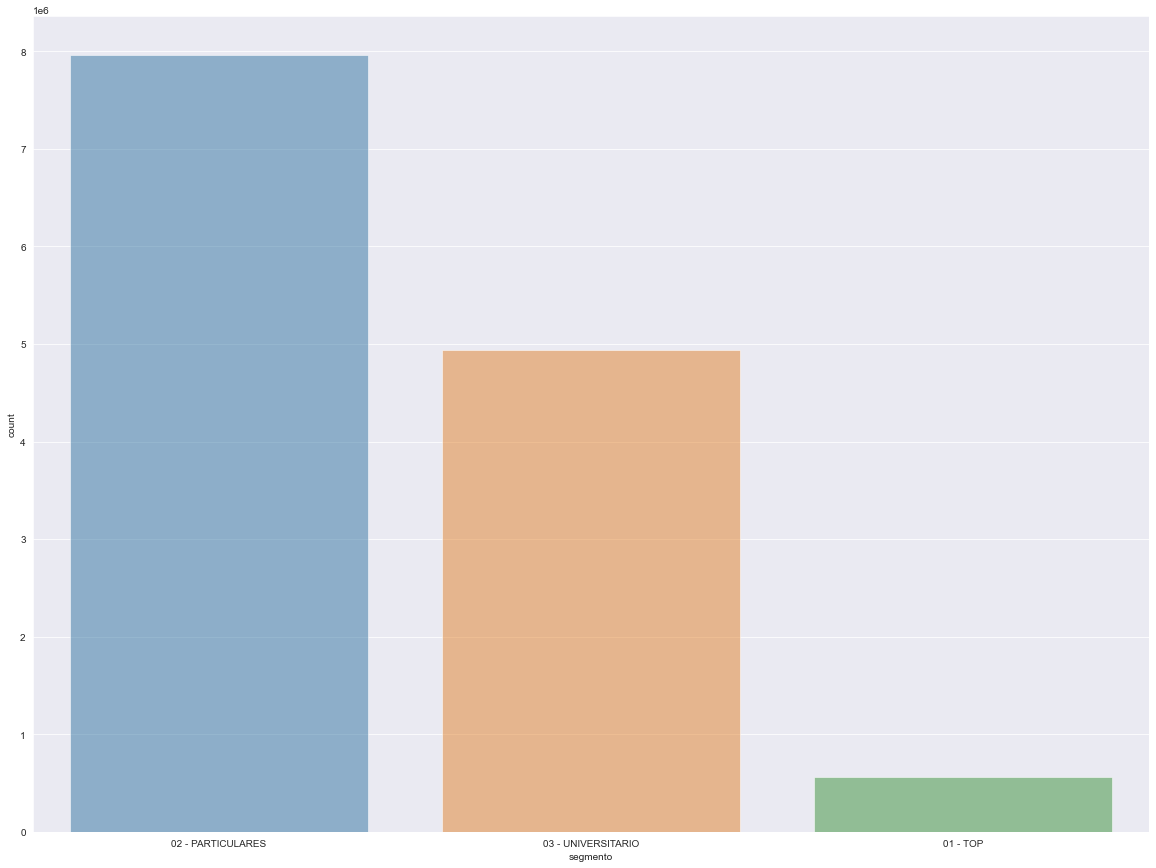

--------------------------------------------------
col :  ind_ahor_fin_ult1


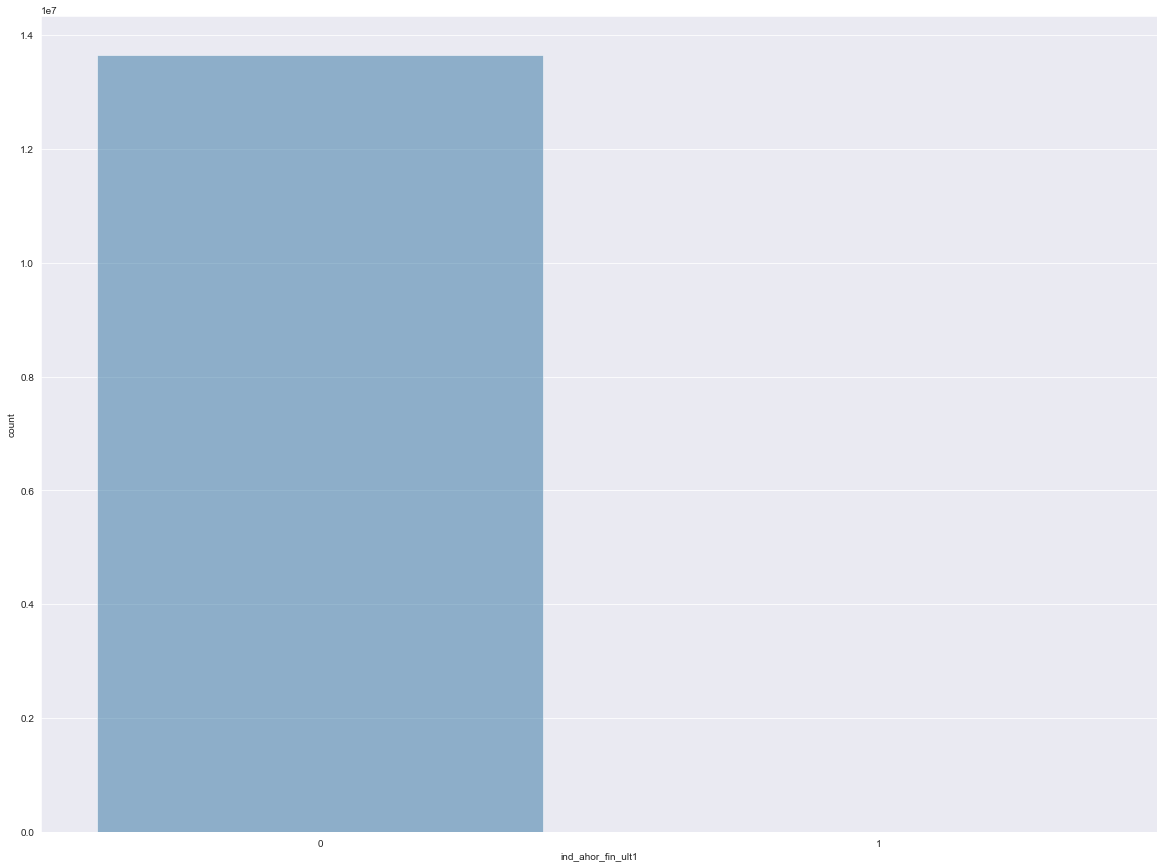

--------------------------------------------------
col :  ind_aval_fin_ult1


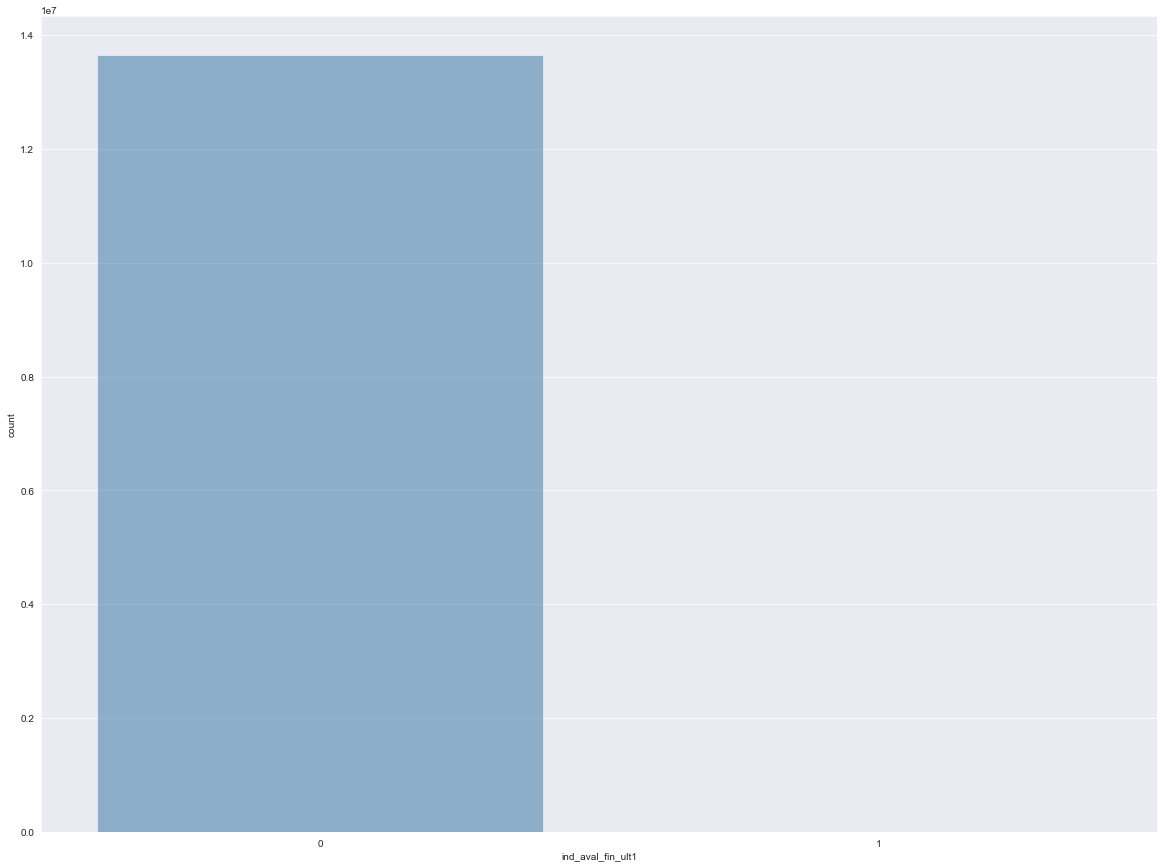

--------------------------------------------------
col :  ind_cco_fin_ult1


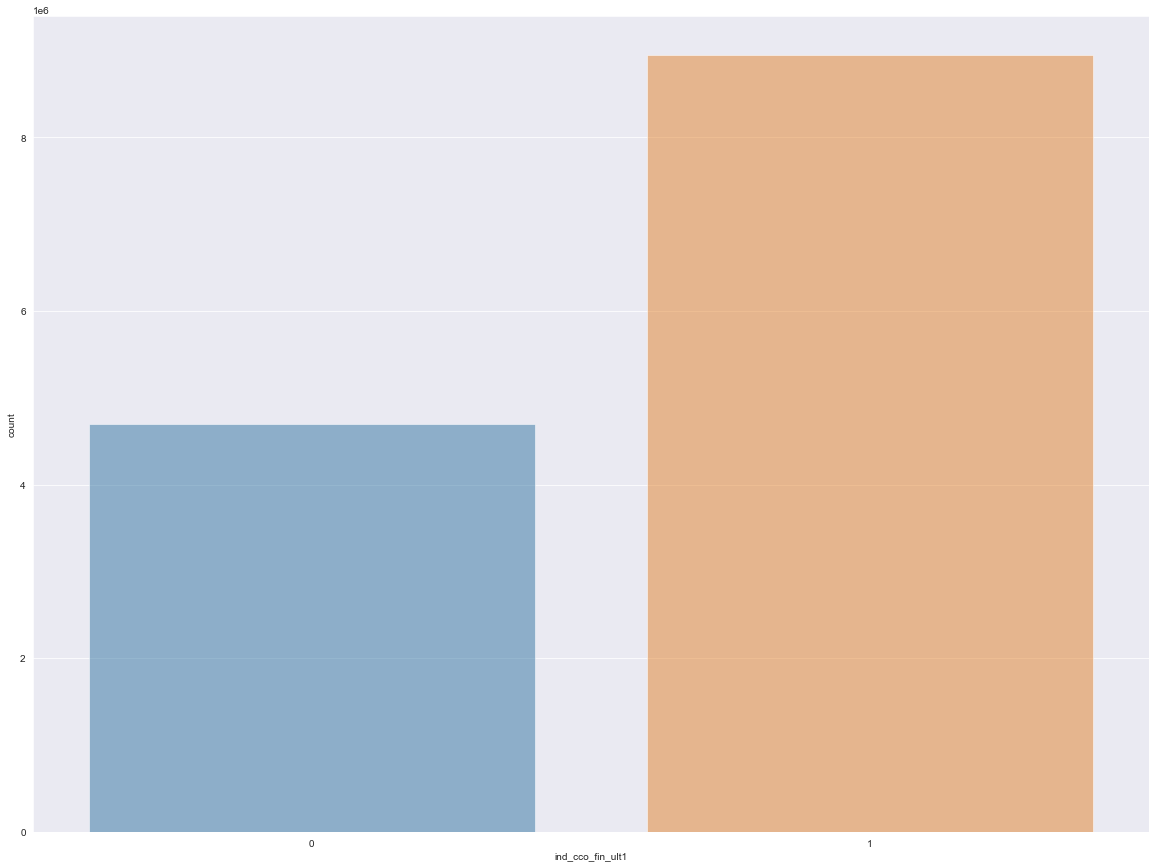

--------------------------------------------------
col :  ind_cder_fin_ult1


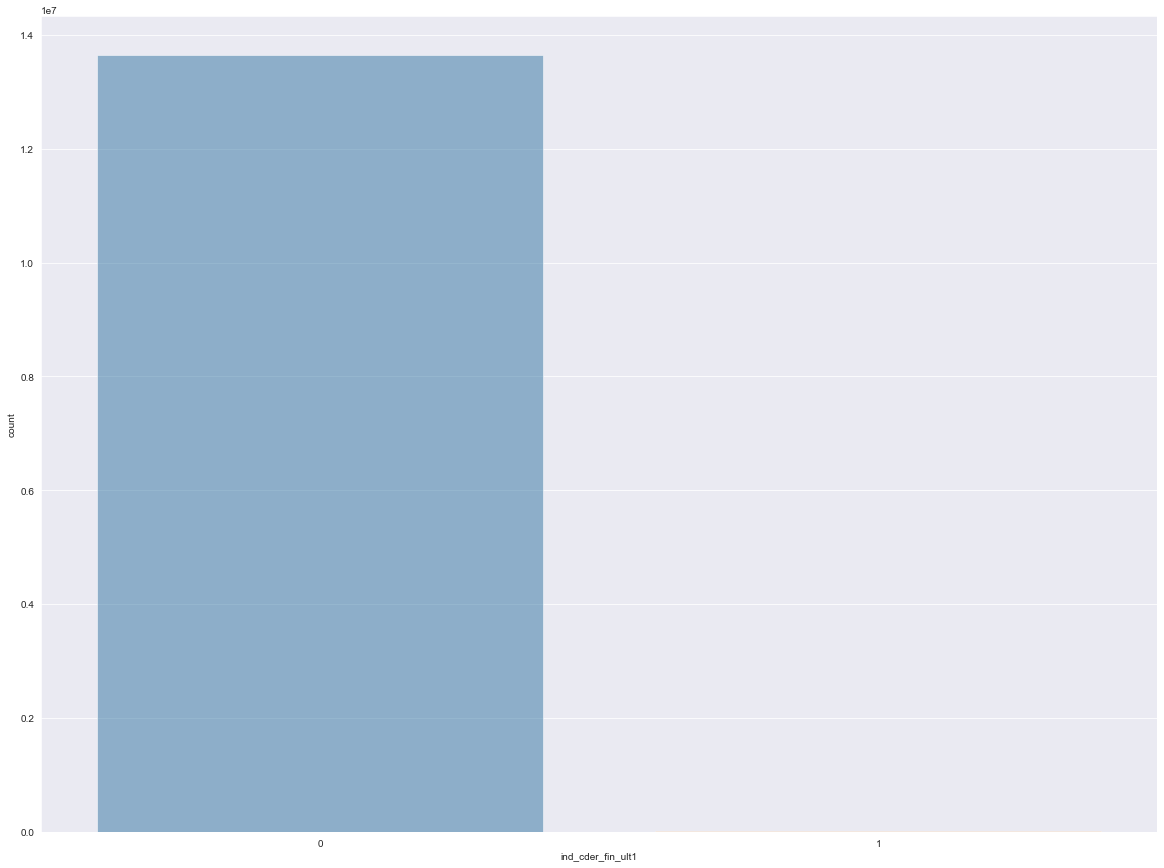

--------------------------------------------------
col :  ind_cno_fin_ult1


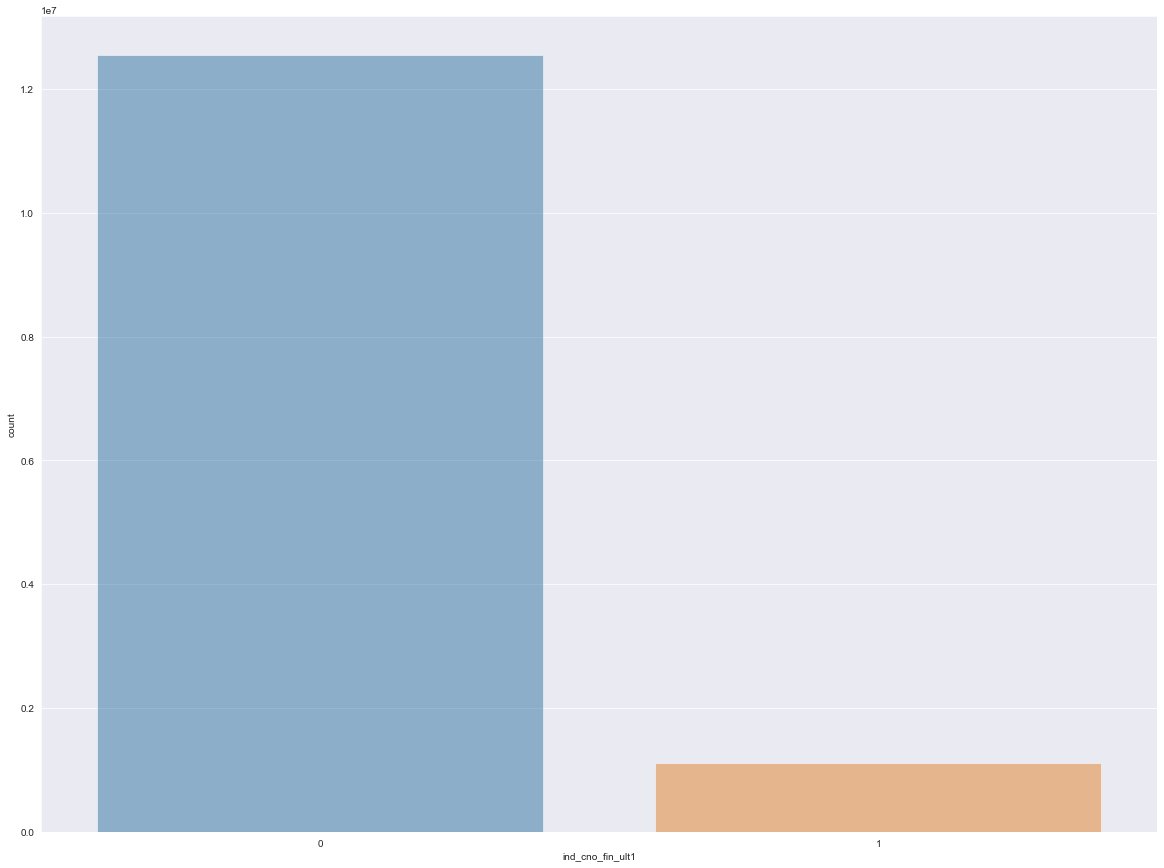

--------------------------------------------------
col :  ind_ctju_fin_ult1


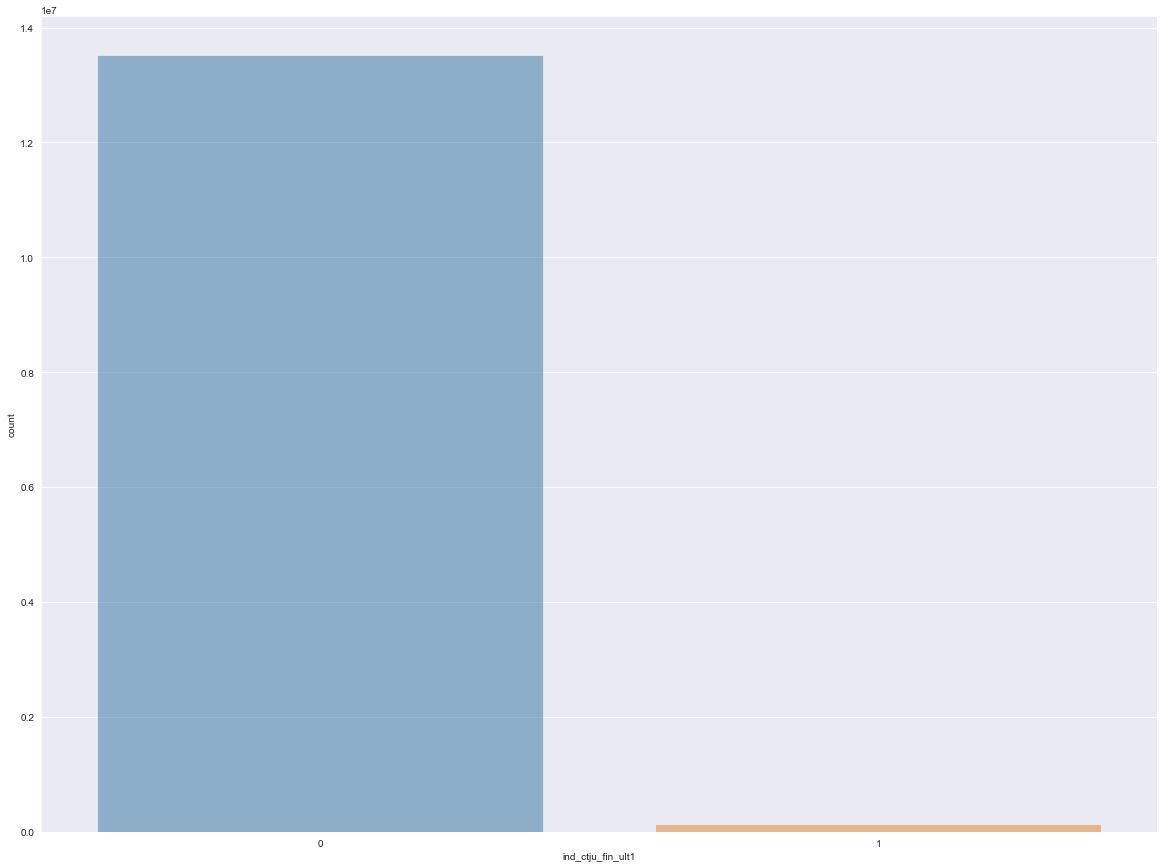

--------------------------------------------------
col :  ind_ctma_fin_ult1


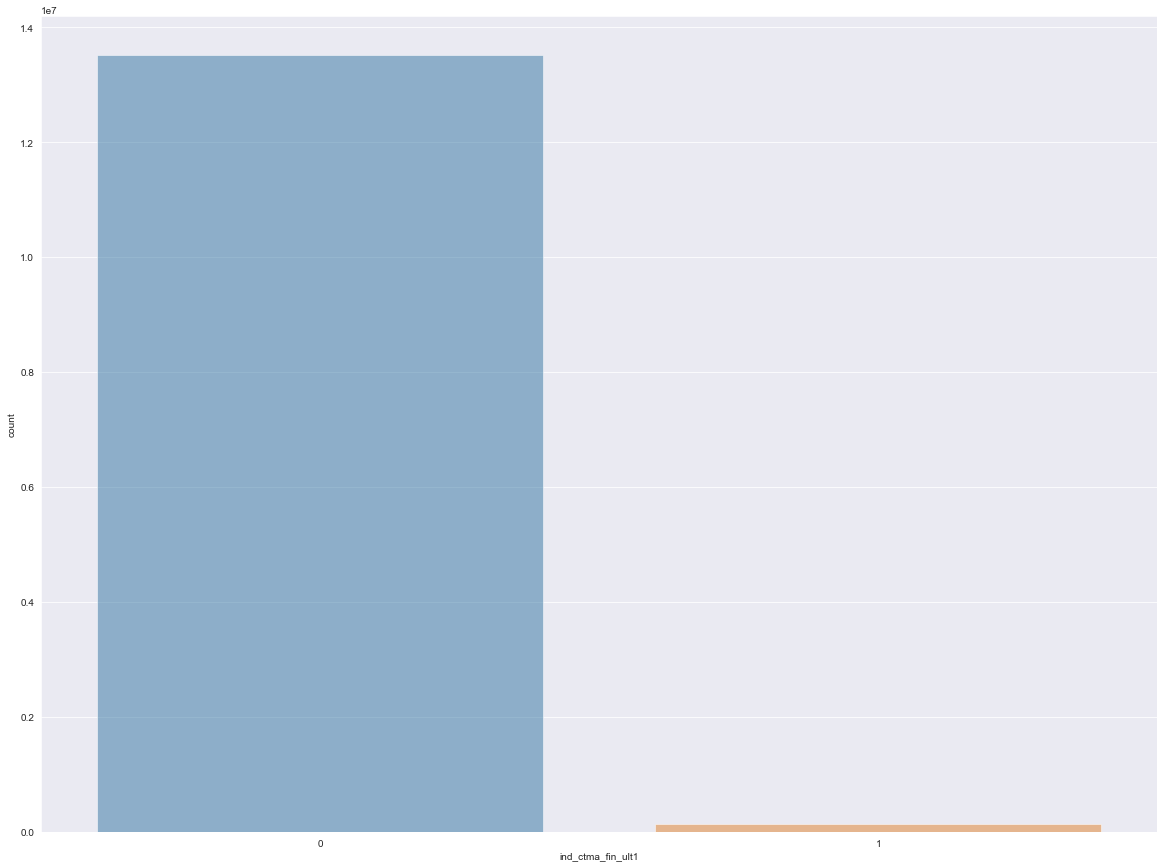

--------------------------------------------------
col :  ind_ctop_fin_ult1


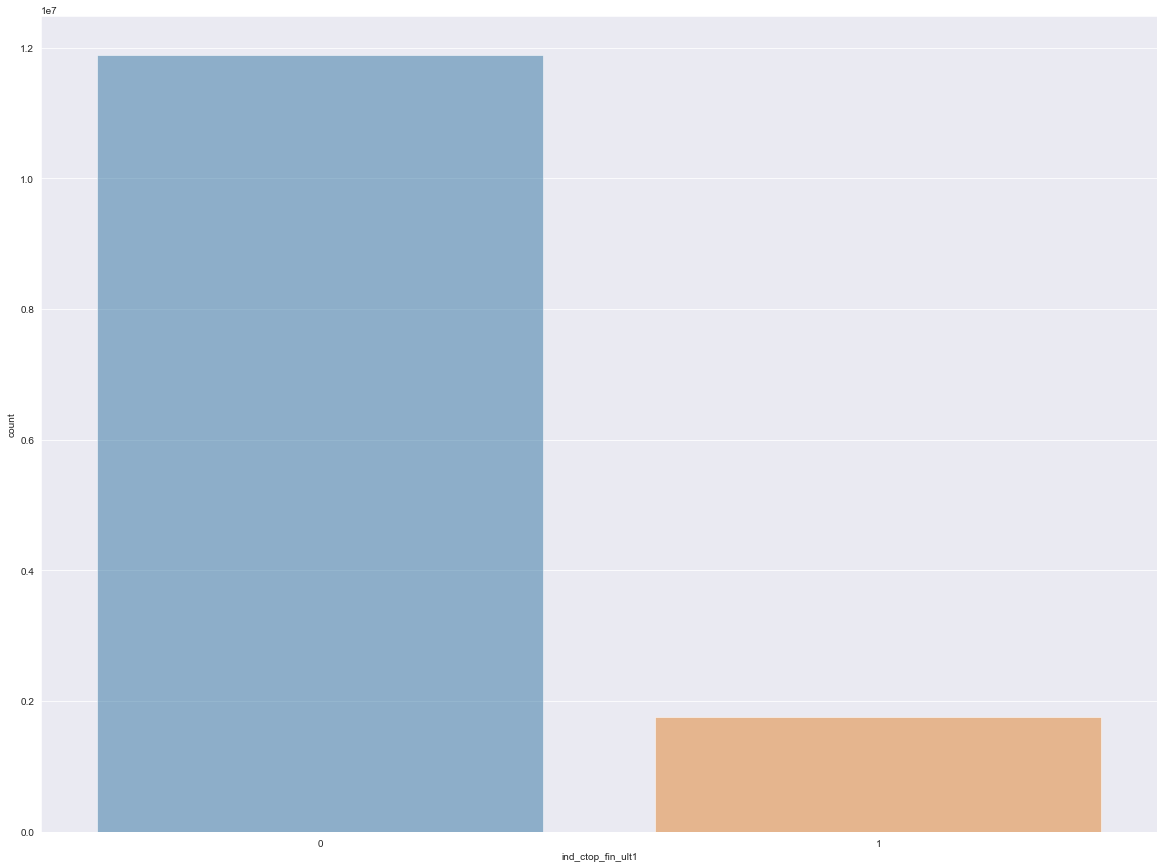

--------------------------------------------------
col :  ind_ctpp_fin_ult1


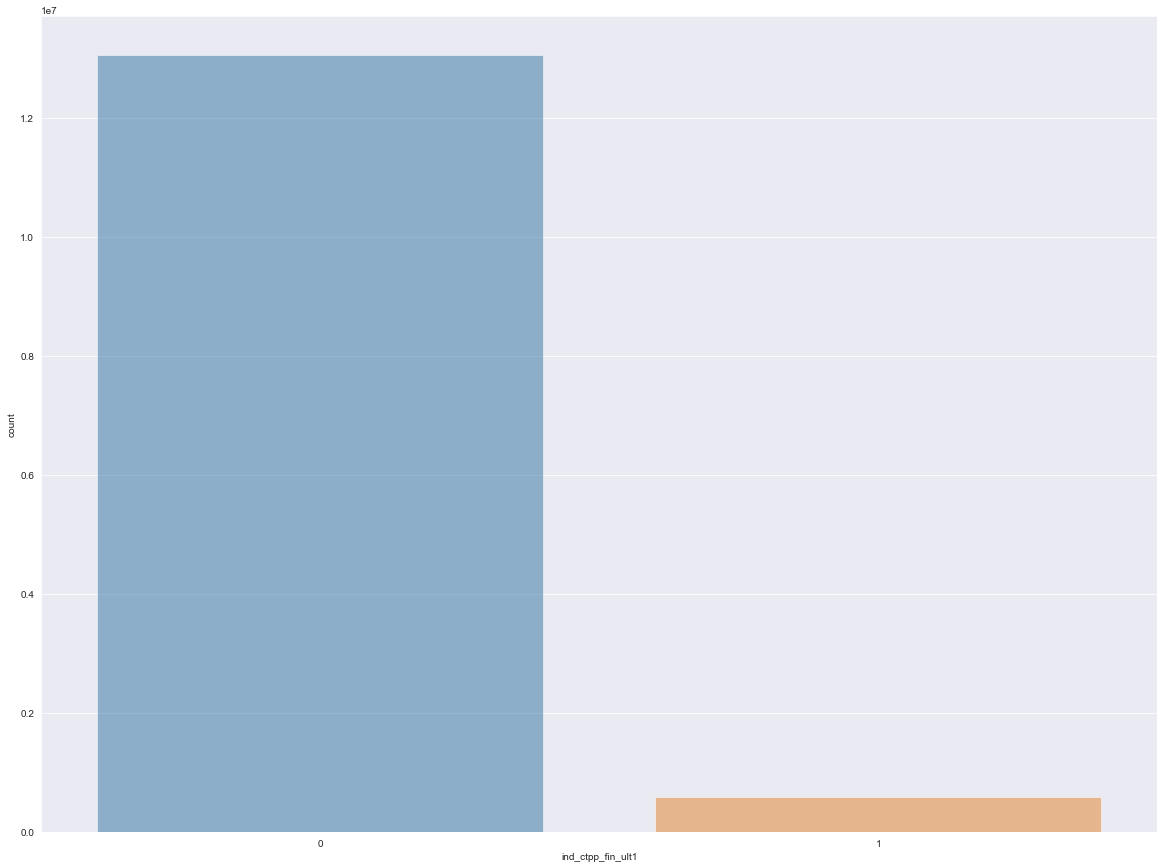

--------------------------------------------------
col :  ind_deco_fin_ult1


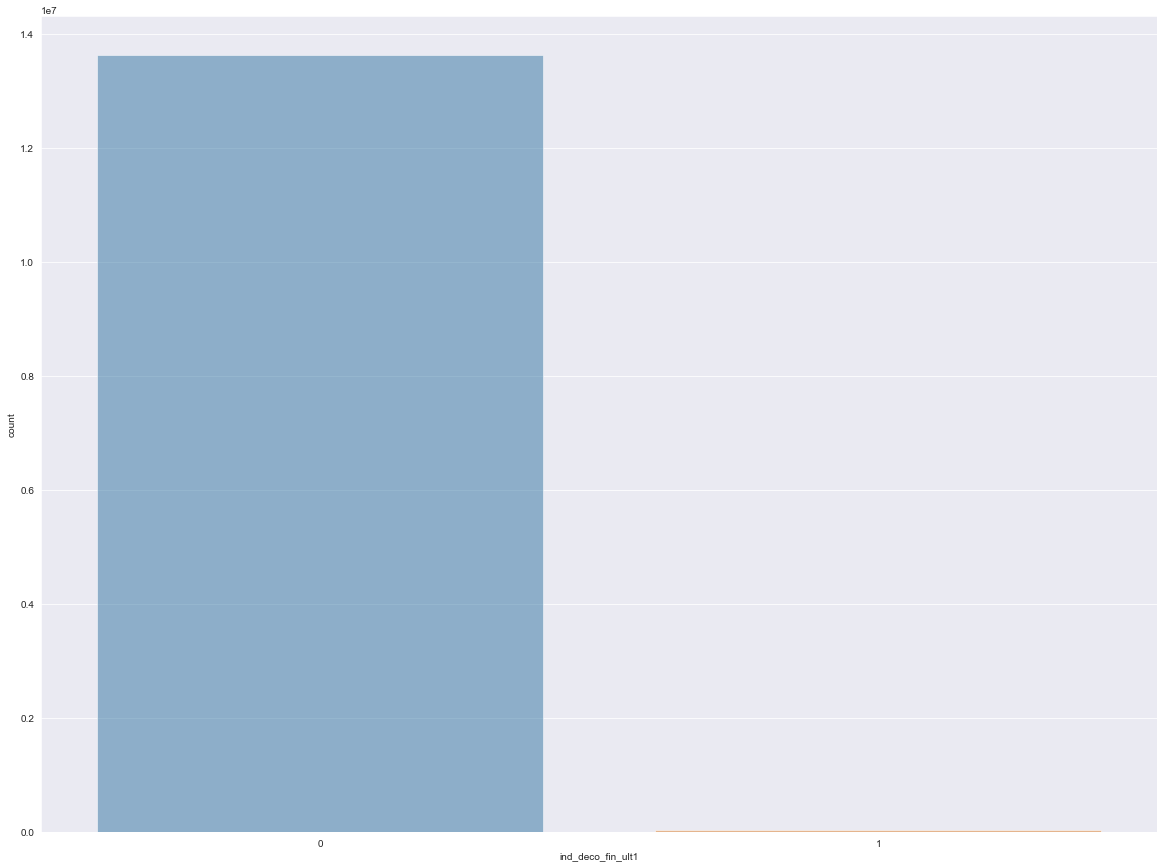

--------------------------------------------------
col :  ind_deme_fin_ult1


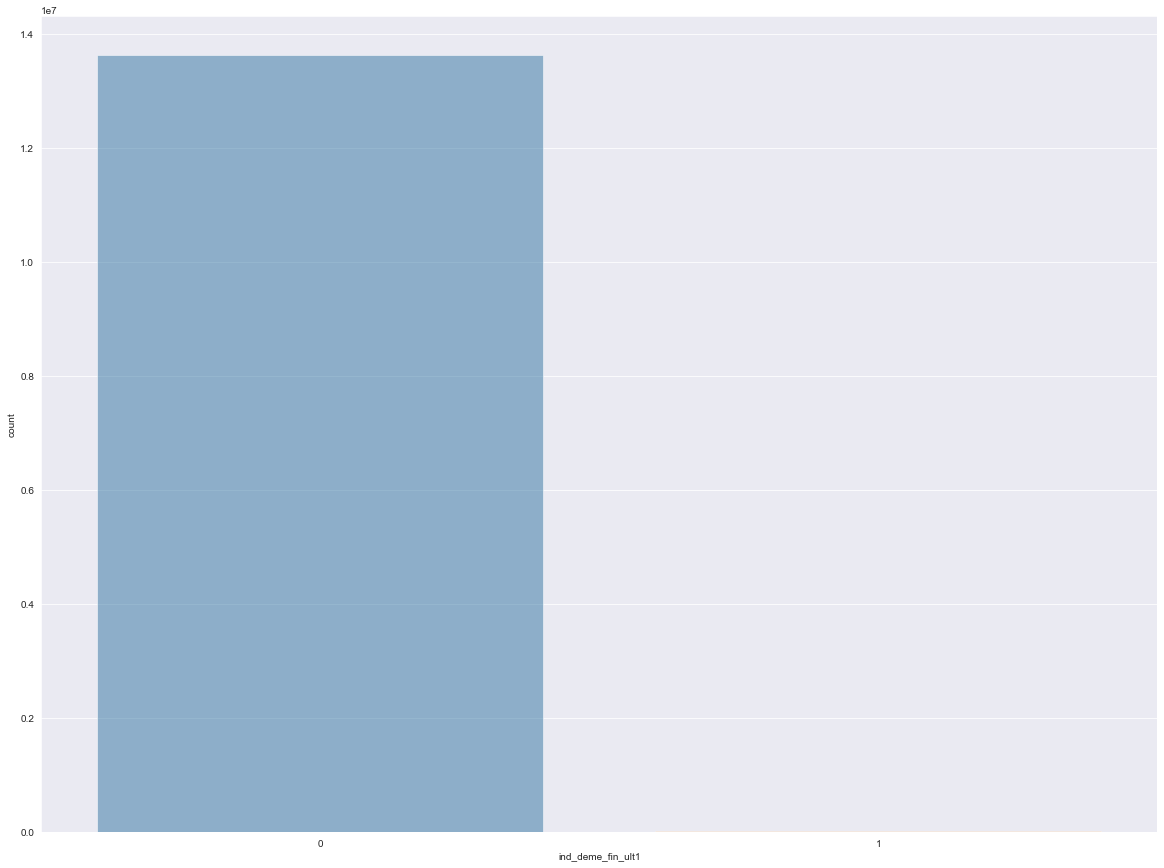

--------------------------------------------------
col :  ind_dela_fin_ult1


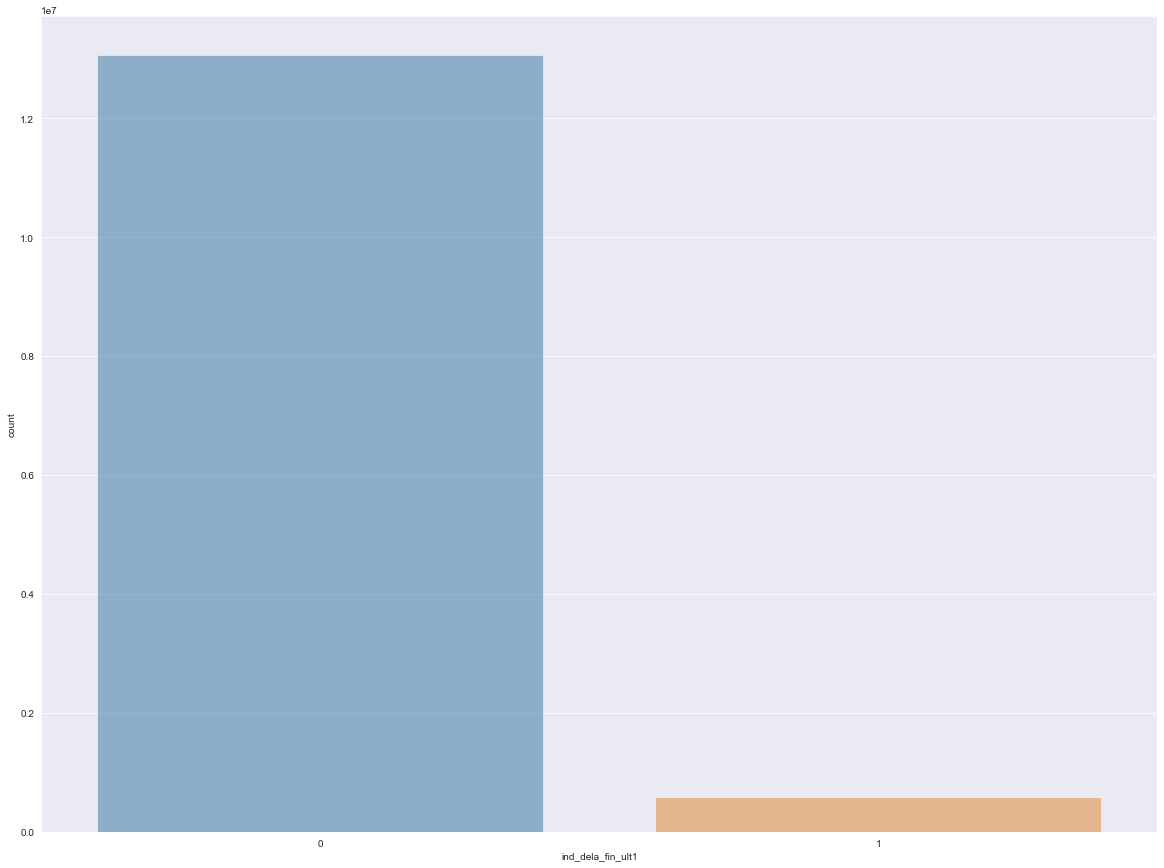

--------------------------------------------------
col :  ind_ecue_fin_ult1


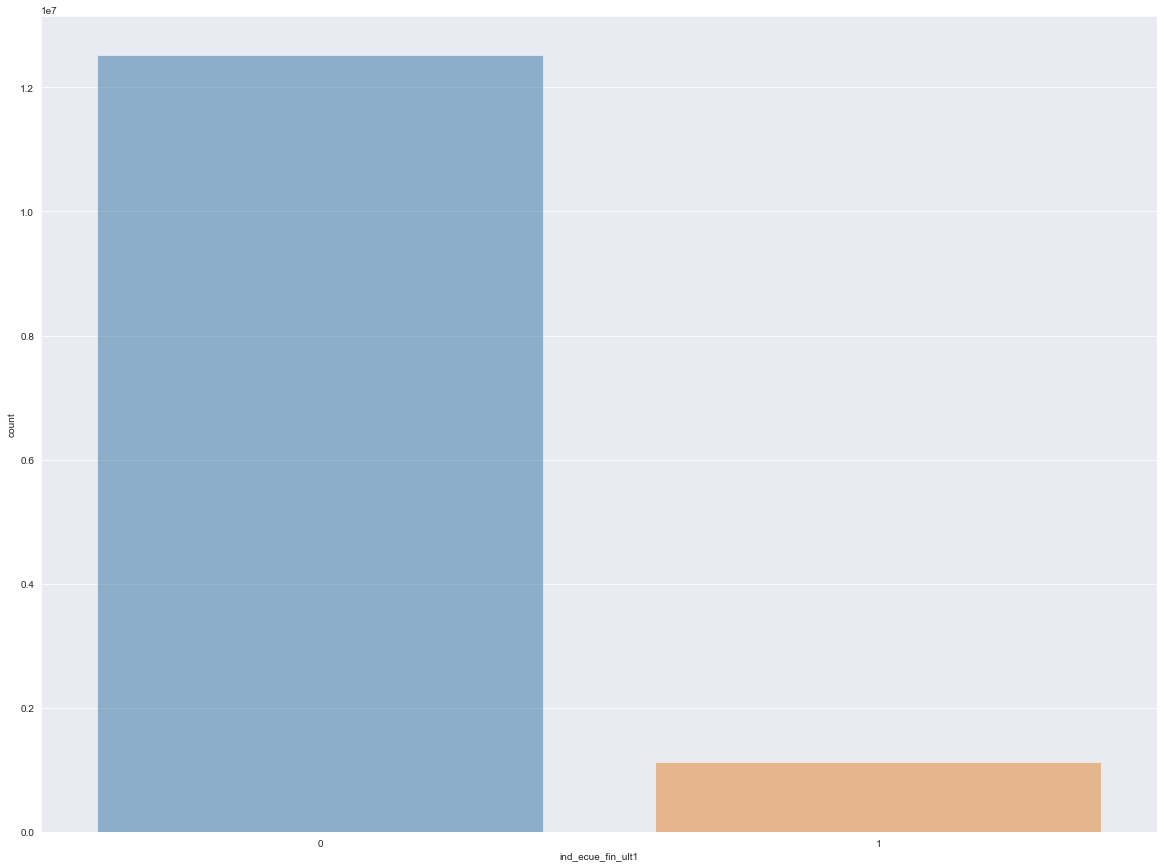

--------------------------------------------------
col :  ind_fond_fin_ult1


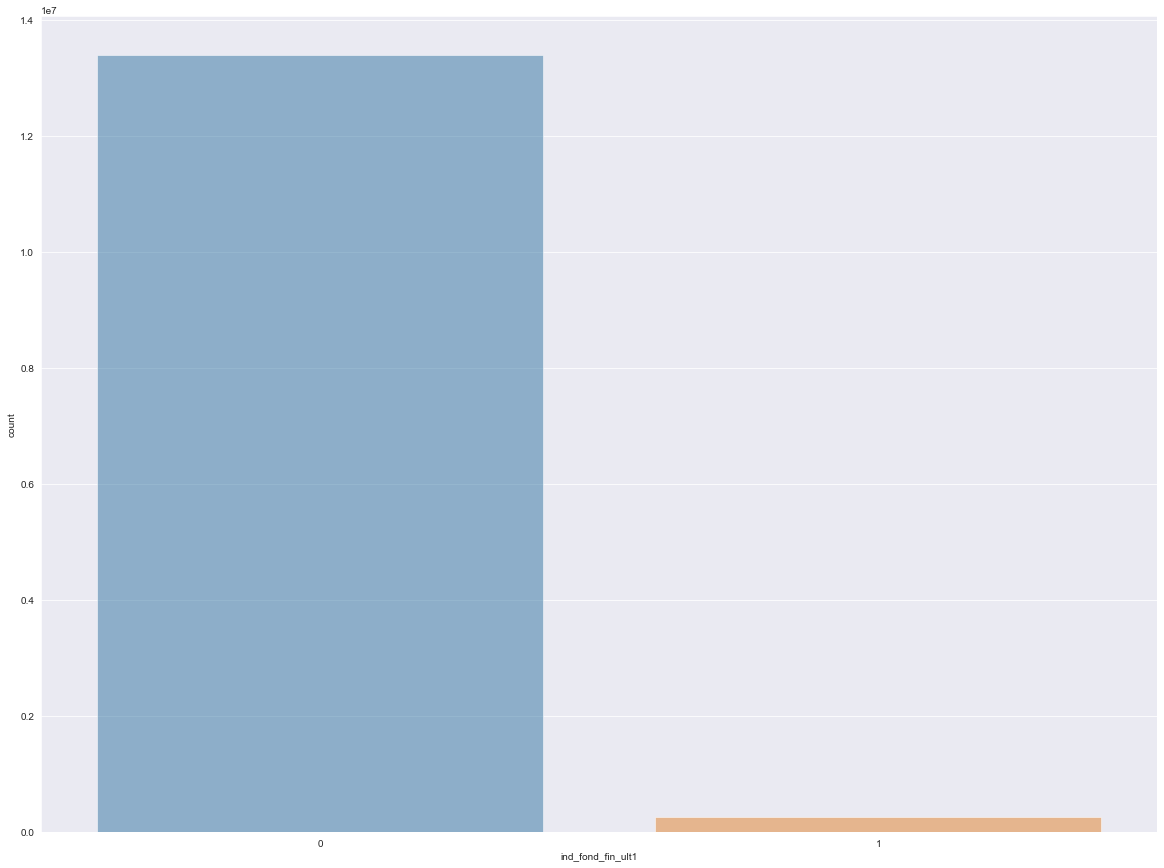

--------------------------------------------------
col :  ind_hip_fin_ult1


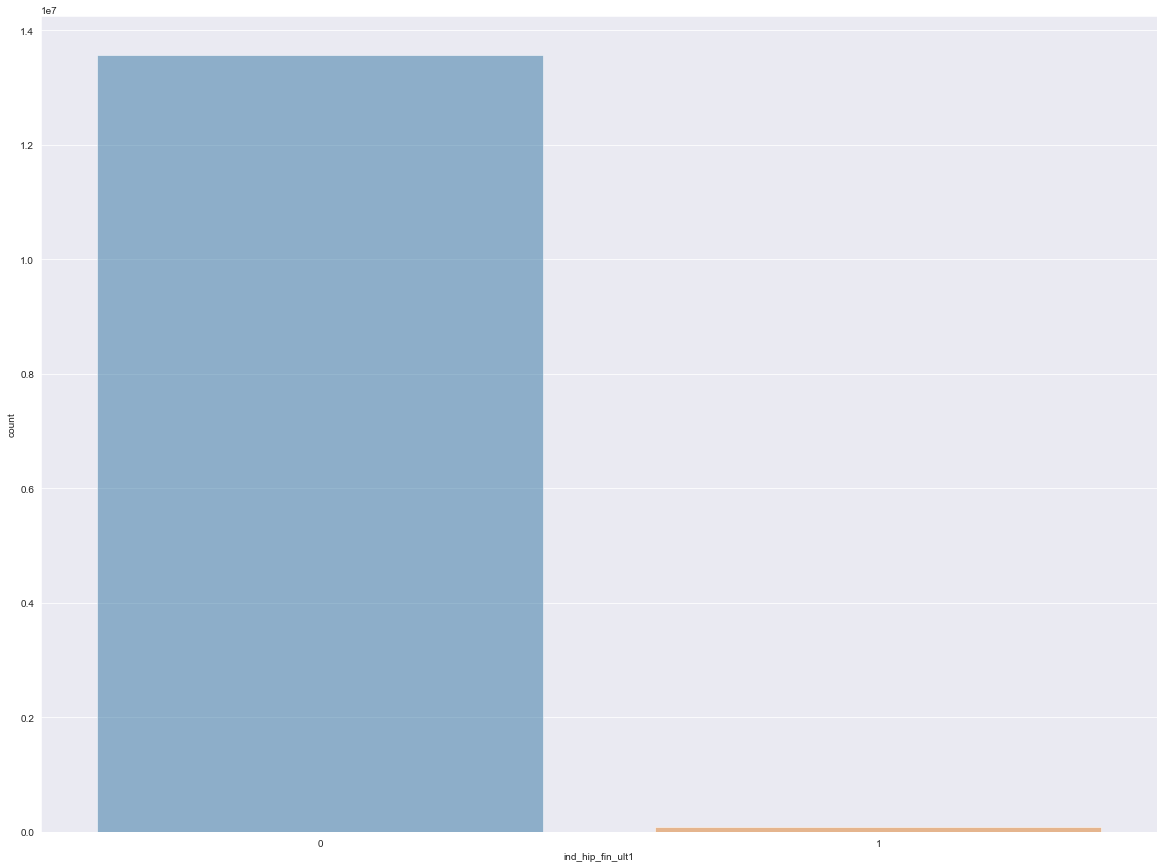

--------------------------------------------------
col :  ind_plan_fin_ult1


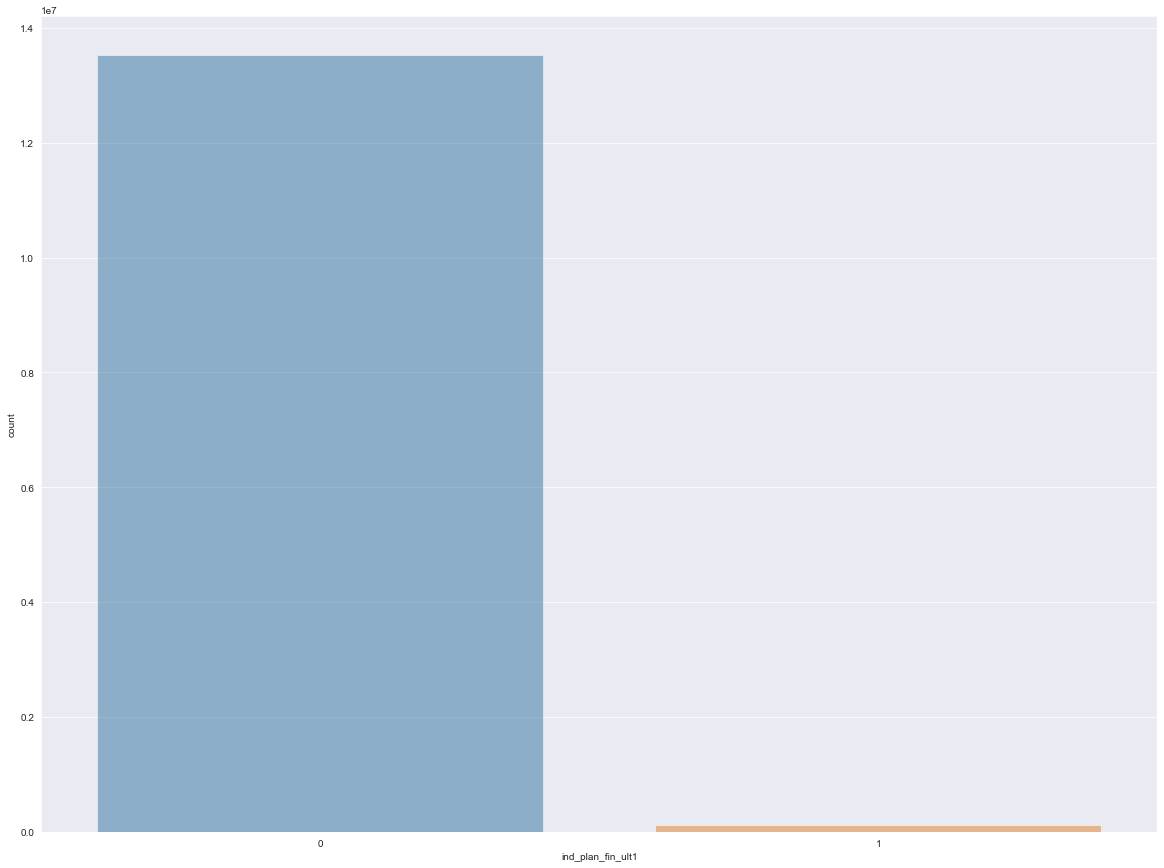

--------------------------------------------------
col :  ind_pres_fin_ult1


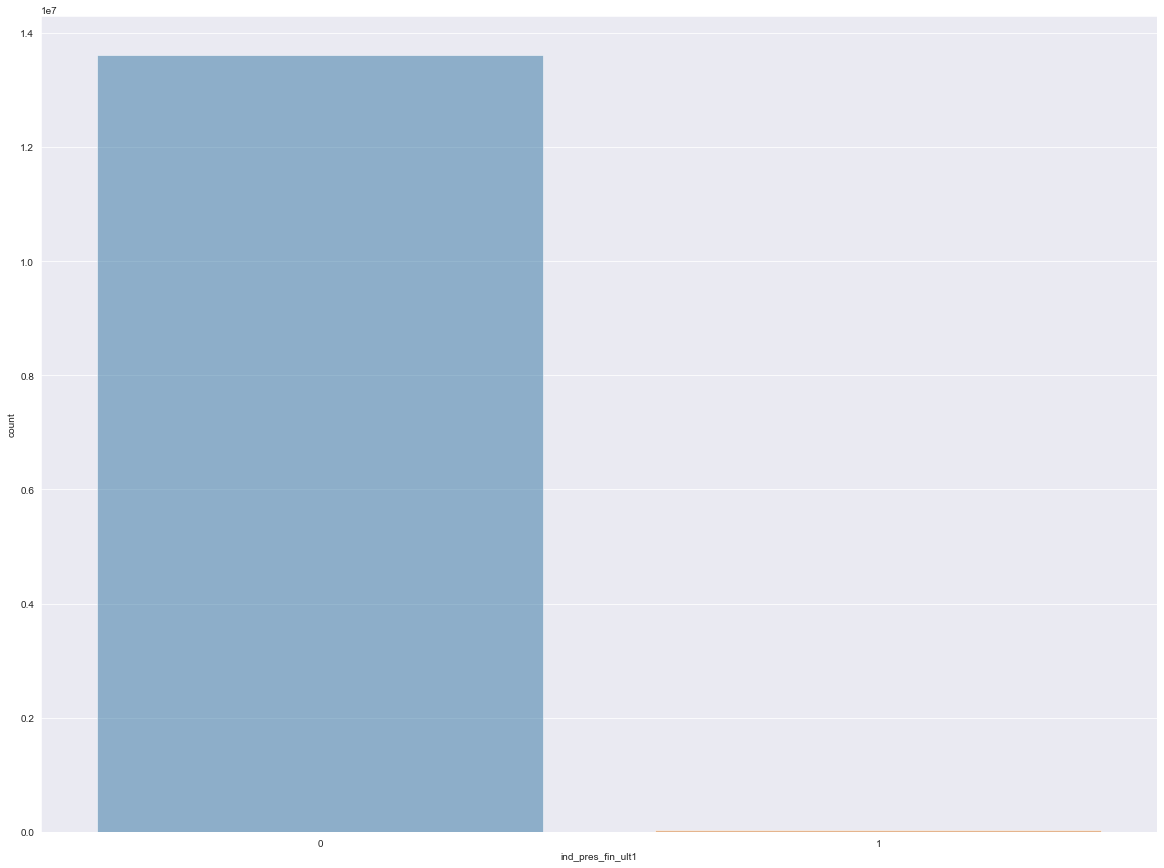

--------------------------------------------------
col :  ind_reca_fin_ult1


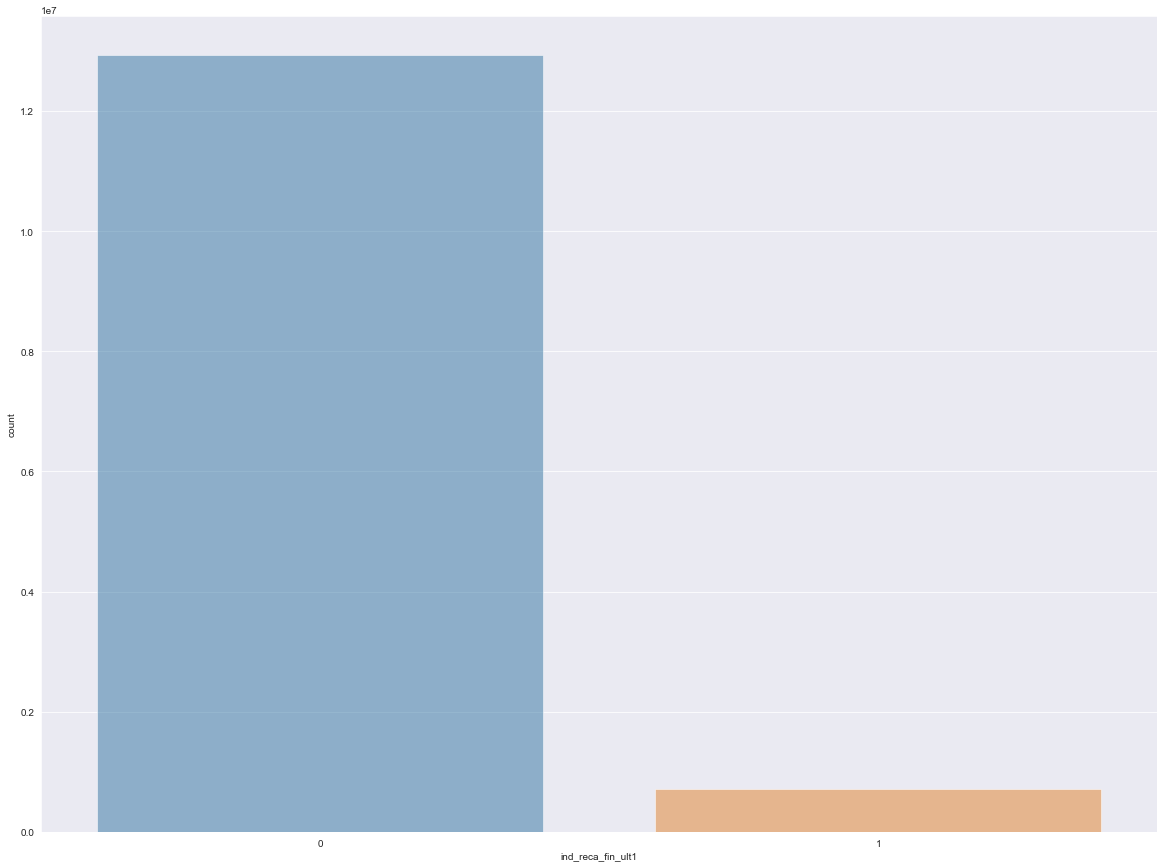

--------------------------------------------------
col :  ind_tjcr_fin_ult1


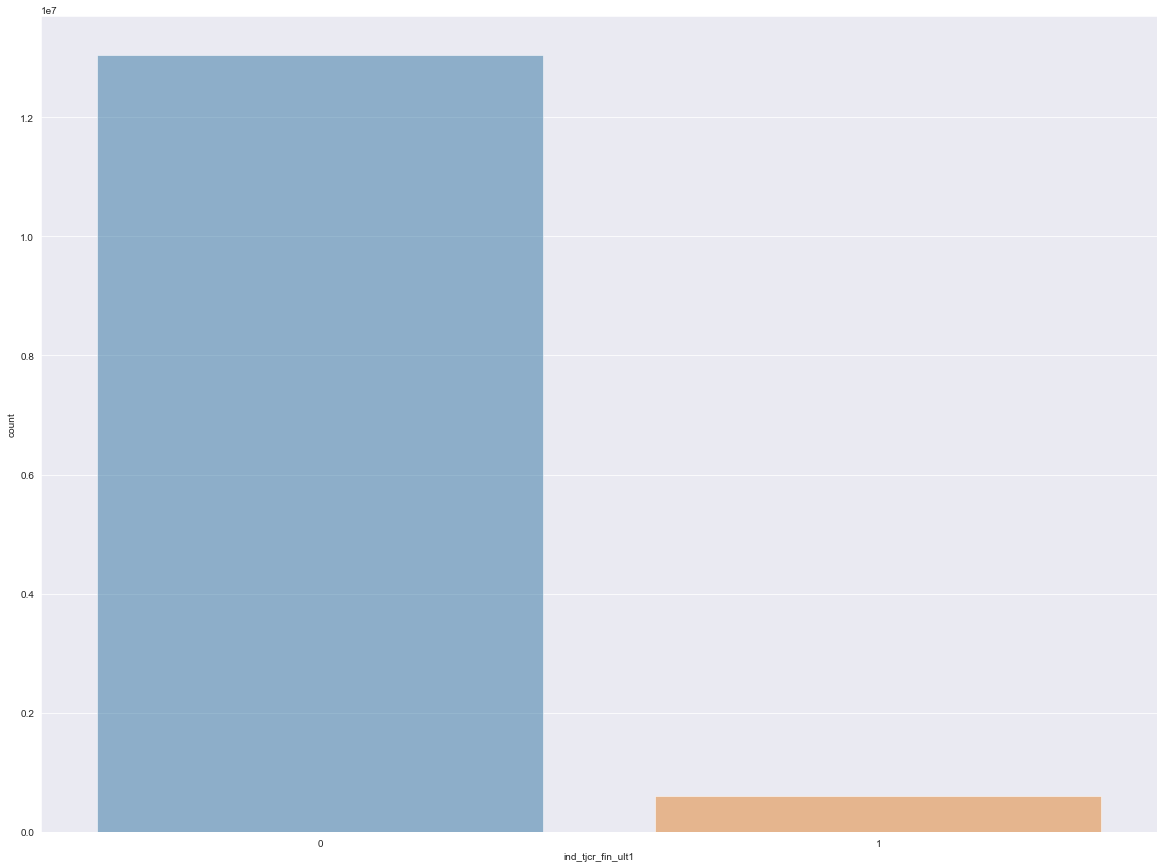

--------------------------------------------------
col :  ind_valo_fin_ult1


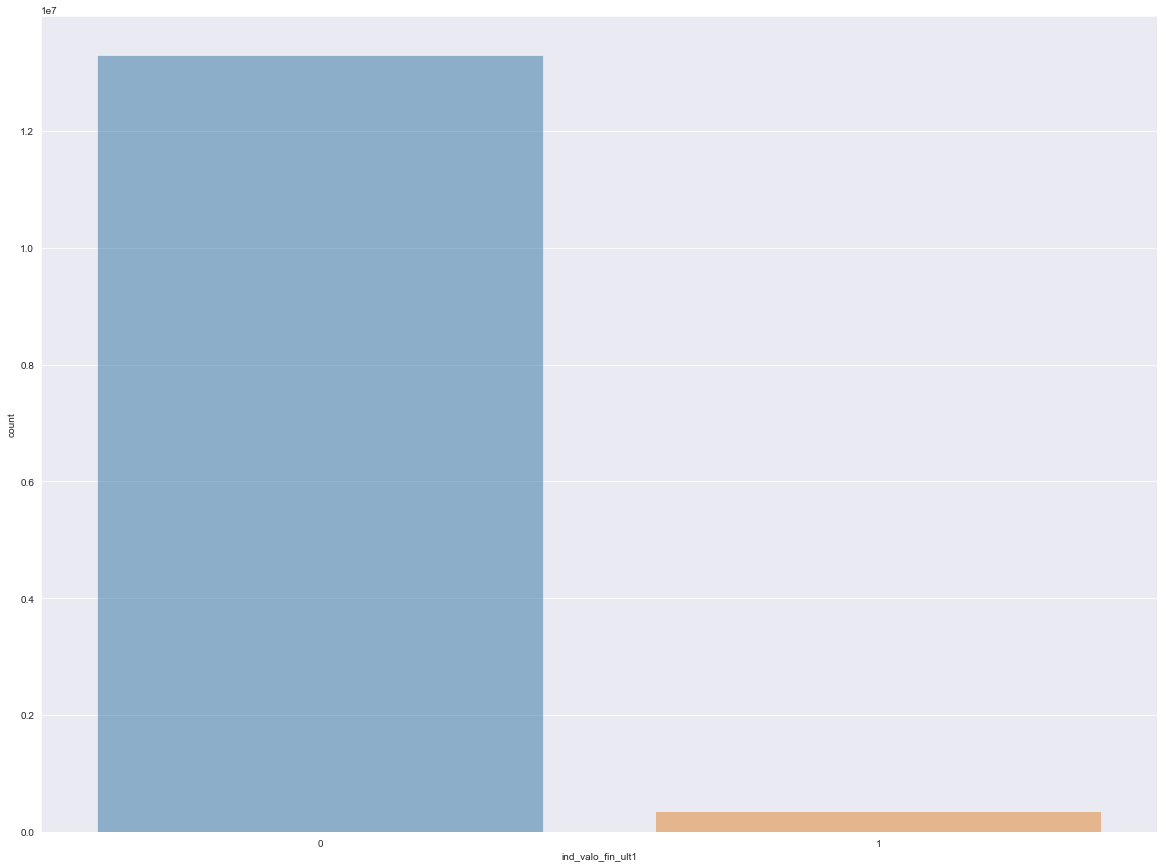

--------------------------------------------------
col :  ind_viv_fin_ult1


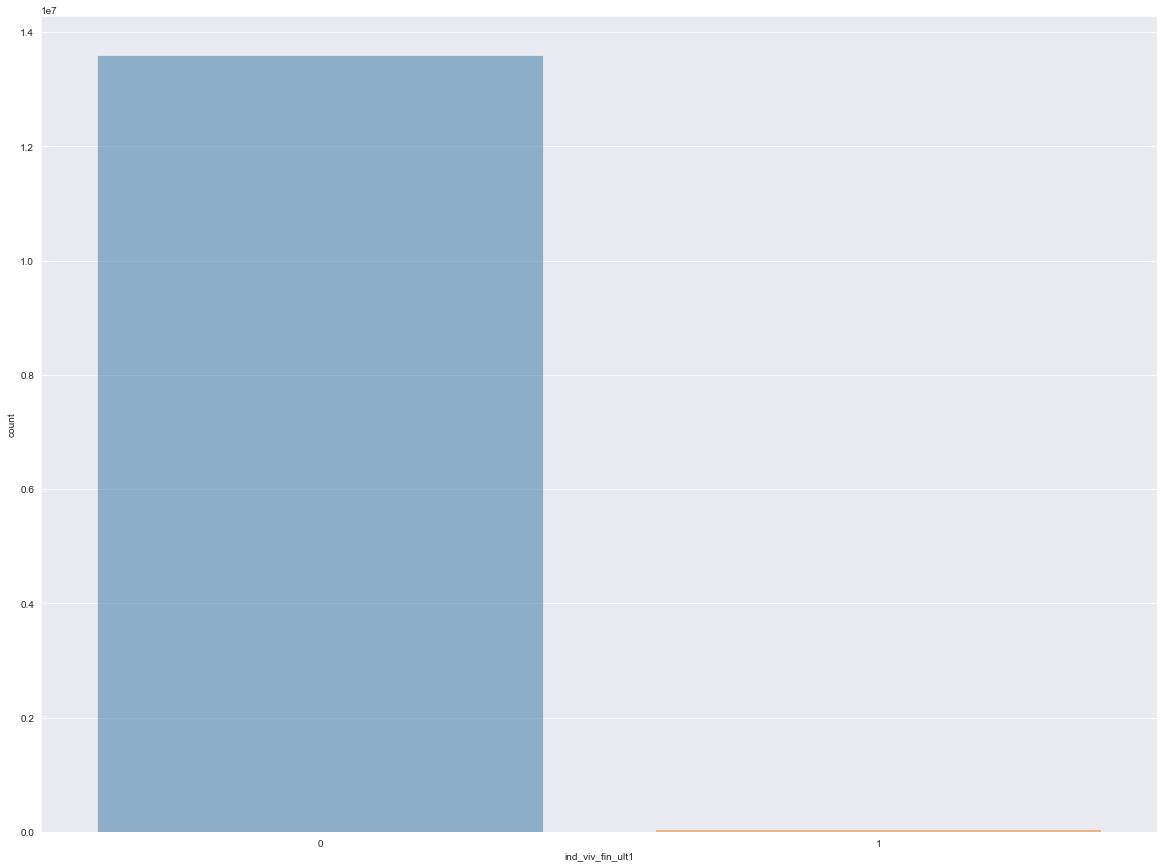

--------------------------------------------------
col :  ind_nomina_ult1


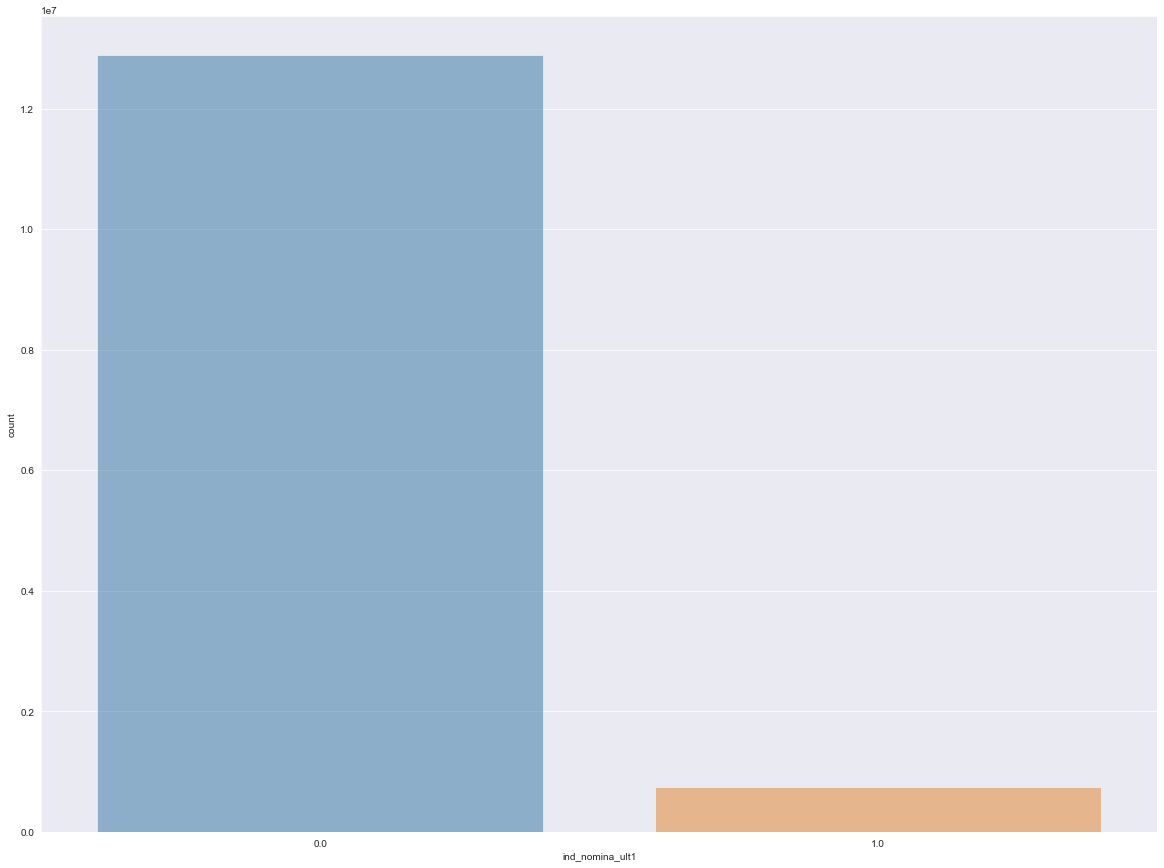

--------------------------------------------------
col :  ind_nom_pens_ult1


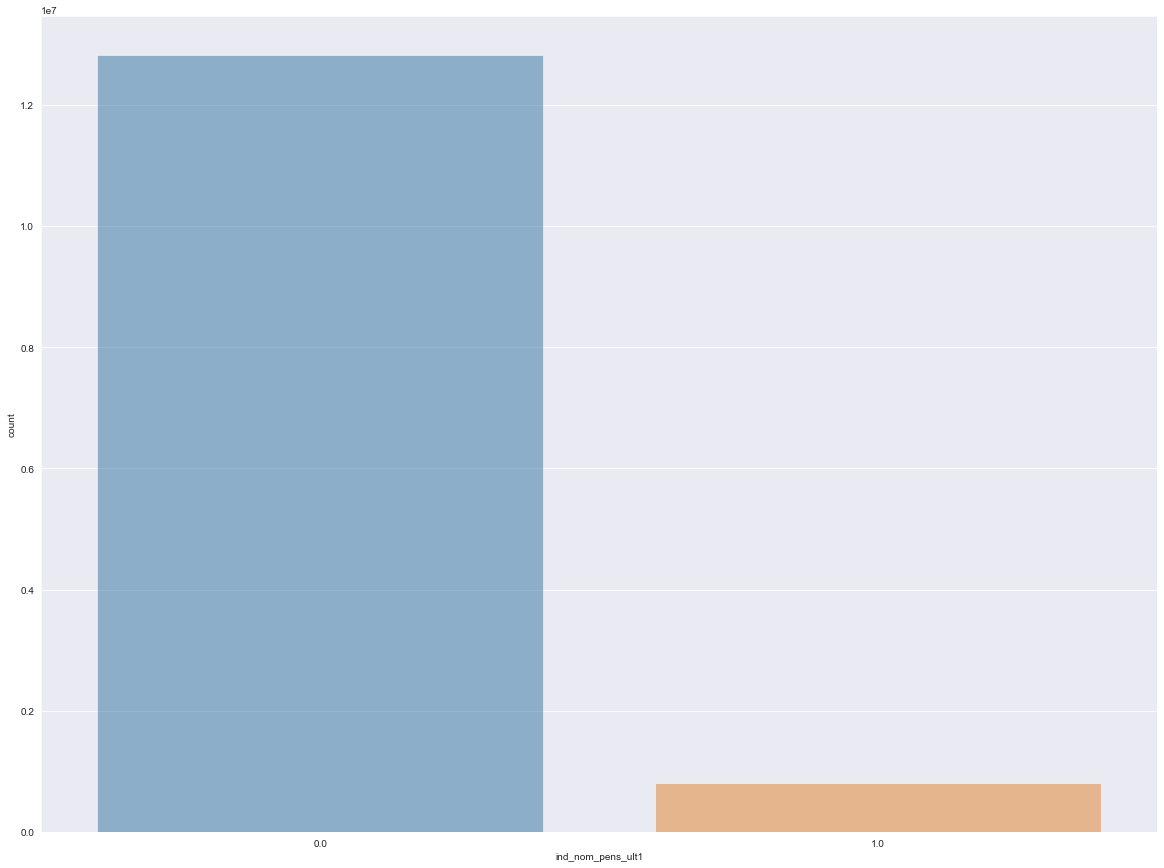

--------------------------------------------------
col :  ind_recibo_ult1


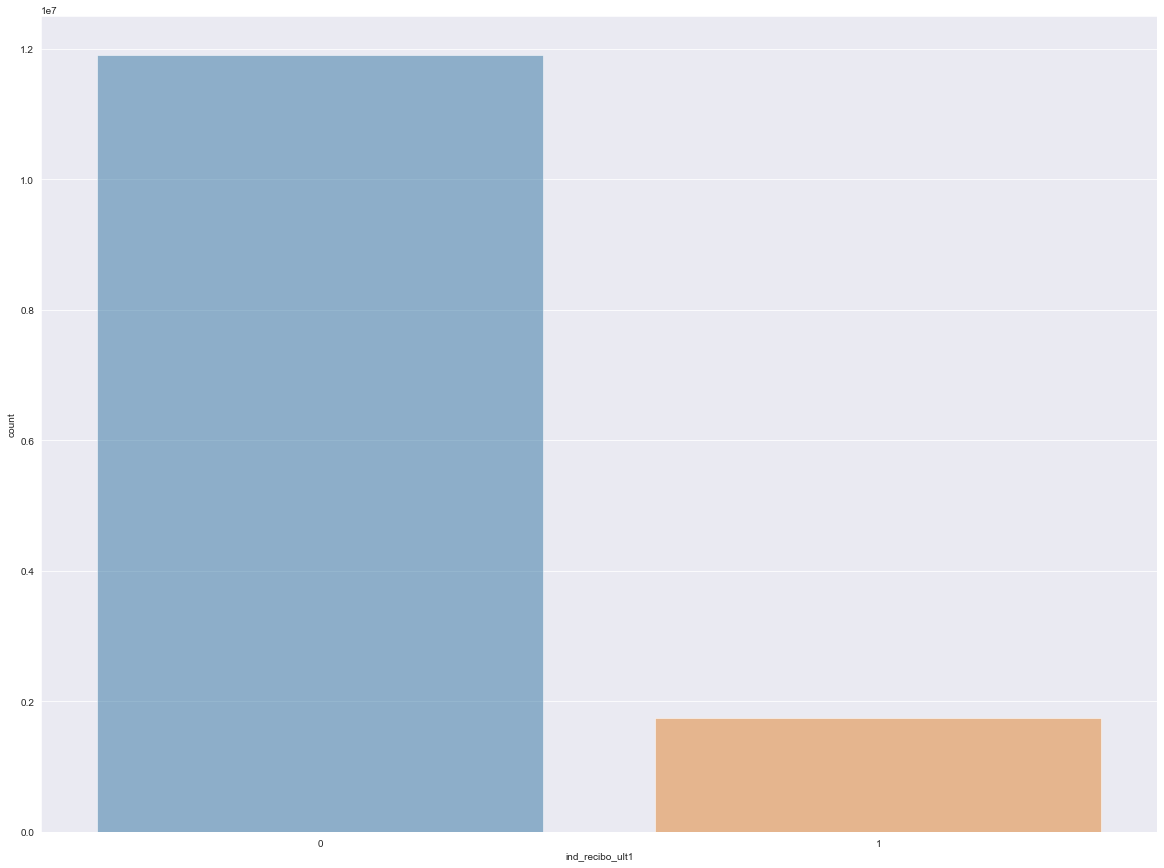

In [7]:
skip_cols = ['ncodpers', 'renta']
for col in train.columns:
    if col in skip_cols:
        continue
    print('-' * 50)
    print('col : ', col)

    f, ax = plt.subplots(figsize=(20, 15))
    sns.countplot(x=col, data=train, alpha=0.5)
    plt.show()

### 시계열 데이터 확인

- 각 변수에 시간 특성 반영하여 데이터 확인


In [8]:
months = train['fecha_dato'].unique().tolist()
# 제품 변수 리스트
label_cols = [x for x in train.columns if 'ult1' in x]    


In [9]:
# 합
label_over_time = []

for label in label_cols:
    # 매월 집계
    label_sum = train.groupby(['fecha_dato'])[label].agg('sum')
    label_over_time.append(label_sum.tolist())

In [11]:
# 누적합
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    

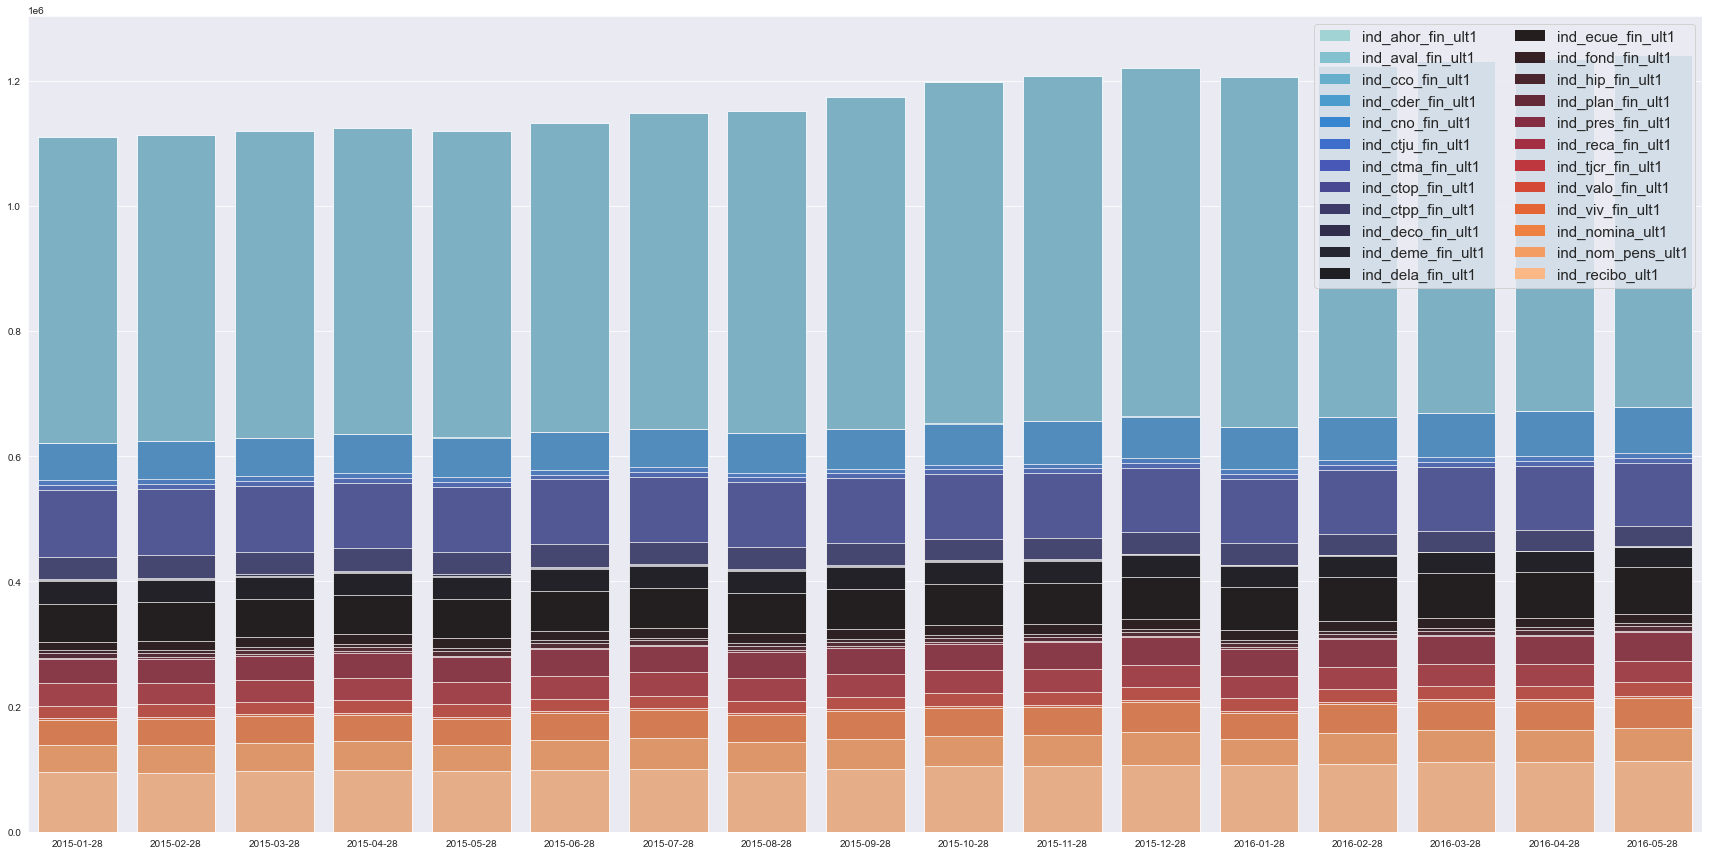

In [40]:
color_list = sns.color_palette("icefire", 24)
f,ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    # x : 월 / y: 누적 총합
    sns.barplot(x=months, y=label_sum_over_time[i], color = color_list[i], alpha=0.7 )
plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i], 
                         edgecolor='none') for i in range(len(label_cols))],label_cols, loc=1, ncol=2, prop={'size':15})

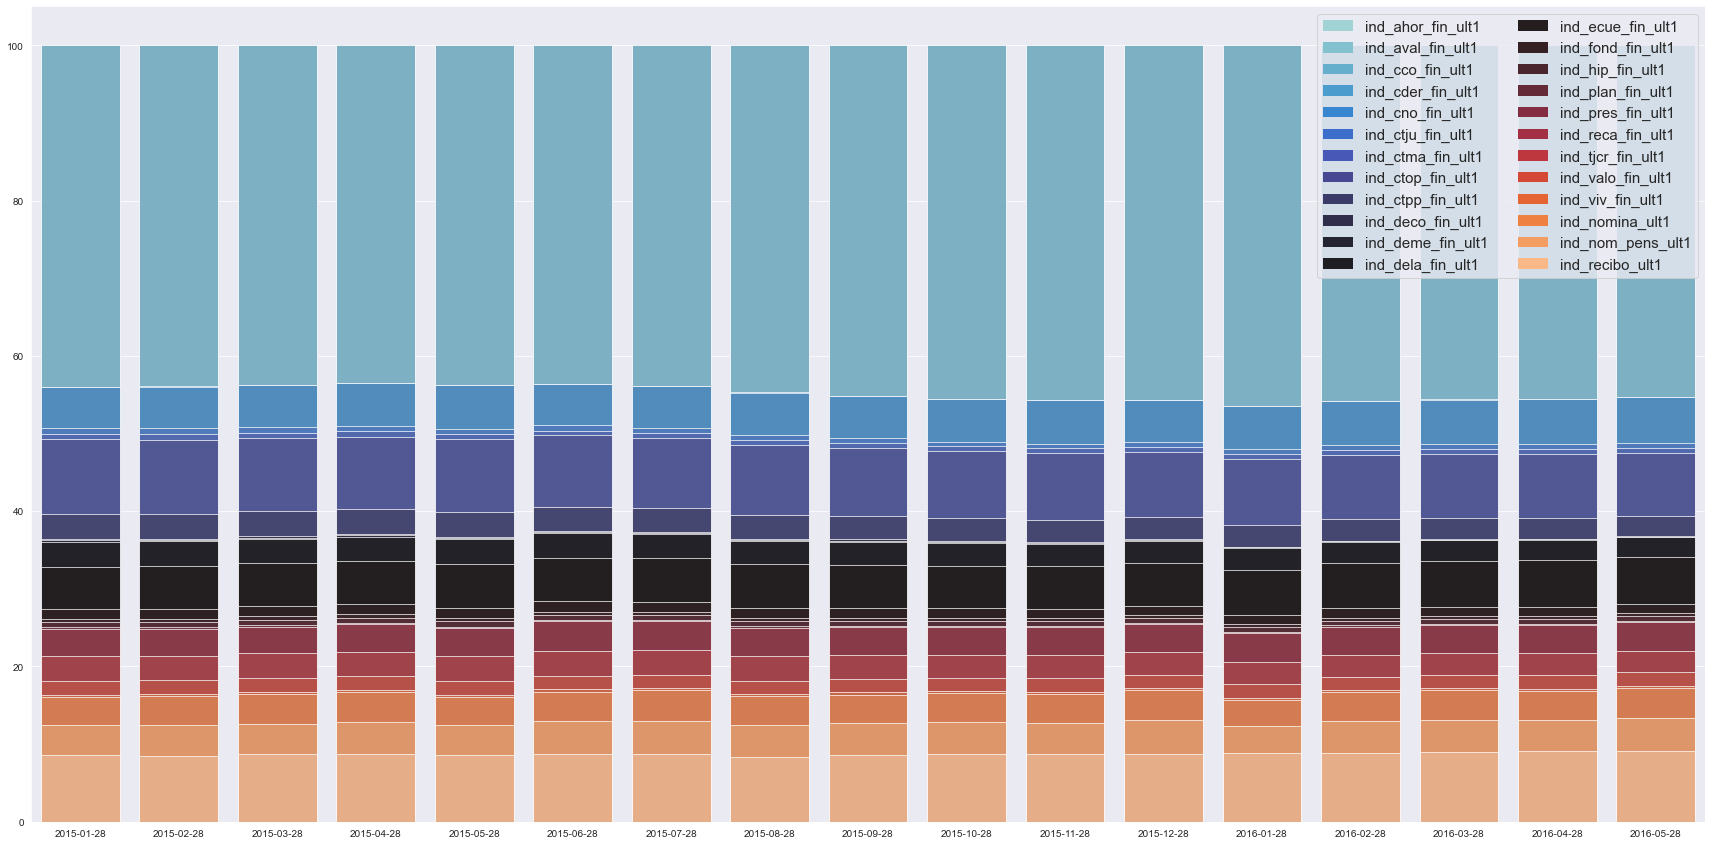

In [39]:
# 월별 상대값 비교
color_list = sns.color_palette("icefire", 24)

label_sum_percent = (label_sum_over_time / (np.asarray(label_sum_over_time).max(axis=0)))*100

f,ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    # x : 월 / y: 누적 총합
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i], alpha=0.7 )
plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i], 
                         edgecolor='none') for i in range(len(label_cols))],
           label_cols, loc=1, ncol=2, prop={'size':15})

In [57]:
# 월별 각 변수의 비율
label_sum_over_time = []
for i in range(len(label_cols)):
    temp = (label_over_time[i]/np.asarray(label_over_time).sum(axis=0))*100
    label_sum_over_time.append(temp)


In [64]:
label_percent_df = pd.DataFrame(label_sum_over_time, columns=months, index=label_cols)
label_percent_df

,2015-01-28,2015-02-28,2015-03-28,2015-04-28,2015-05-28,2015-06-28,2015-07-28,2015-08-28,2015-09-28,2015-10-28,2015-11-28,2015-12-28,2016-01-28,2016-02-28,2016-03-28,2016-04-28,2016-05-28
ind_ahor_fin_ult1,0.007932,0.007998,0.007955,0.007735,0.007590,0.007329,0.007143,0.007119,0.006901,0.006761,0.006707,0.006472,0.006466,0.006378,0.006336,0.006240,0.006288
ind_aval_fin_ult1,0.001713,0.001797,0.001877,0.001867,0.001875,0.001854,0.001655,0.001650,0.001619,0.001502,0.001490,0.001475,0.001492,0.001308,0.001300,0.001297,0.001290
ind_cco_fin_ult1,43.975979,43.915117,43.713025,43.480723,43.732062,43.622655,43.895519,44.697681,45.122752,45.533165,45.688422,45.635634,46.388827,45.791386,45.610196,45.531147,45.271890
ind_cder_fin_ult1,0.027133,0.027051,0.028154,0.027827,0.027950,0.027903,0.027876,0.028043,0.027179,0.026459,0.026413,0.026134,0.026776,0.026820,0.025915,0.025448,0.025473
ind_cno_fin_ult1,5.296985,5.394645,5.445783,5.531764,5.660628,5.284322,5.366650,5.469449,5.432285,5.462901,5.579144,5.426876,5.588319,5.612248,5.698045,5.815482,5.889461
ind_ctju_fin_ult1,0.699228,0.691091,0.685896,0.680391,0.682854,0.670728,0.660476,0.656018,0.640791,0.628014,0.621487,0.621064,0.629620,0.622420,0.618782,0.616340,0.611106
ind_ctma_fin_ult1,0.758811,0.739441,0.703861,0.665188,0.633652,0.611037,0.604464,0.607138,0.611738,0.621921,0.649059,0.671038,0.684333,0.687753,0.707981,0.701194,0.652701
ind_ctop_fin_ult1,9.597455,9.529959,9.446305,9.349882,9.371456,9.236372,9.084637,9.033963,8.833566,8.622168,8.519989,8.403740,8.469233,8.318206,8.235565,8.188697,8.108498
ind_ctpp_fin_ult1,3.262671,3.238872,3.203975,3.169466,3.169955,3.120704,3.061518,3.039595,2.964544,2.891250,2.850677,2.804660,2.819071,2.763850,2.732001,2.712870,2.681982
ind_deco_fin_ult1,0.136384,0.184680,0.214152,0.216840,0.185291,0.159205,0.160720,0.165741,0.168867,0.163180,0.126930,0.078483,0.040786,0.028619,0.026889,0.026096,0.025553


* ind_cco_fin_ult1 (당좌예금): 43% 전후로 가장 많음
* ind_ctop_fin_ult1 (특정 계정): 약 8~9%
* ind_recibo_ult1 (직불 카드): 약 8~9%
-> 월별 큰 차이는 없음